<a href="https://colab.research.google.com/github/SaugataDeb/SaugataDeb-Bike-Sharing_Demand_Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#**let's import the modules**

In [ ]:
#importing all the modules required for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid",{'grid.linestyle': '--'})

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

!pip install shap
from sklearn.tree import export_graphviz
import shap 
!pip install catBoost
from catboost import CatBoostRegressor
import lightgbm as lgb
!pip install eli5
import eli5 as eli

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

#**Let's mount the Drive**

In [ ]:
#mounting the google drive to explore the data

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading dataset from google drive

data='/content/drive/MyDrive/Capstone Project 2/Data & resources/SeoulBikeData.csv'

seoul_df=pd.read_csv(data,encoding='latin')


##Let's first Explore the Data

In [ ]:
seoul_df.head() #let's get the dataset information of 1st 5 rows

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
seoul_df.shape 

(8760, 14)

Here we can see there is 8760 rows and 14 columns which we can also summarise as feature of the dataset

In [ ]:
seoul_df.info()  #checking the null values,the data types and the number of rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

* Here we can conclude that there is 8760 rows and 14 columns or features where there is 6 float type features, 4 integer type feature and 4 string or object type feature
* Also according to our problem statement we can say that we have 'Rented Bike Count' as Dependent feature and 13 other feature as independent.

In [ ]:
seoul_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

* As from the information aquired we can say there no such null values in the dataset.

In [ ]:
#checking the overall information of the dataframe using .describe method
seoul_df.describe(include='all')

Date  Rented Bike Count         Hour  Temperature(°C)  \
count         8760        8760.000000  8760.000000      8760.000000   
unique         365                NaN          NaN              NaN   
top     01/12/2017                NaN          NaN              NaN   
freq            24                NaN          NaN              NaN   
mean           NaN         704.602055    11.500000        12.882922   
std            NaN         644.997468     6.922582        11.944825   
min            NaN           0.000000     0.000000       -17.800000   
25%            NaN         191.000000     5.750000         3.500000   
50%            NaN         504.500000    11.500000        13.700000   
75%            NaN        1065.250000    17.250000        22.500000   
max            NaN        3556.000000    23.000000        39.400000   

        Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count   8760.000000       8760.000000       8760.000000   
unique          NaN               NaN               NaN   
top             NaN               NaN               NaN   
freq            NaN               NaN               NaN   
mean      58.226256          1.724909       1436.825799   
std       20.362413          1.036300        608.298712   
min        0.000000          0.000000         27.000000   
25%       42.000000          0.900000        940.000000   
50%       57.000000          1.500000       1698.000000   
75%       74.000000          2.300000       2000.000000   
max       98.000000          7.400000       2000.000000   

        Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
count                 8760.000000              8760.000000   8760.000000   
unique                        NaN                      NaN           NaN   
top                           NaN                      NaN           NaN   
freq                          NaN                      NaN           NaN   
mean                     4.073813                 0.569111      0.148687   
std                     13.060369                 0.868746      1.128193   
min                    -30.600000                 0.000000      0.000000   
25%                     -4.700000                 0.000000      0.000000   
50%                      5.100000                 0.010000      0.000000   
75%                     14.800000                 0.930000      0.000000   
max                     27.200000                 3.520000     35.000000   

        Snowfall (cm) Seasons     Holiday Functioning Day  
count     8760.000000    8760        8760            8760  
unique            NaN       4           2               2  
top               NaN  Spring  No Holiday             Yes  
freq              NaN    2208        8328            8465  
mean         0.075068     NaN         NaN             NaN  
std          0.436746     NaN         NaN             NaN  
min          0.000000     NaN         NaN             NaN  
25%          0.000000     NaN         NaN             NaN  
50%          0.000000     NaN         NaN             NaN  
75%          0.000000     NaN         NaN             NaN  
max          8.800000     NaN         NaN             NaN

In [ ]:
#checking the duplicate values
len(seoul_df[seoul_df.duplicated()])  

0

Using len function to count the number of duplicates we found that there is no such null values.

In [ ]:
seoul_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

#**Exploratory Data Analysis**

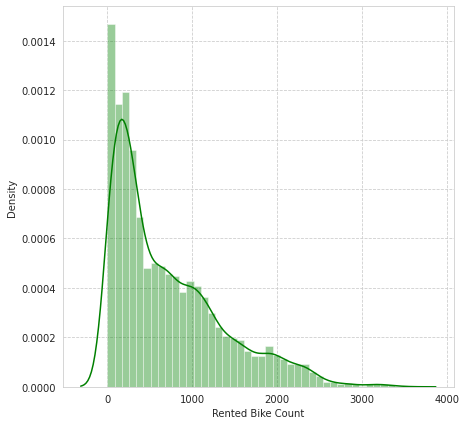

In [ ]:
#Dependent variable rented bike count
plt.figure(figsize=(7,7))
sns.distplot(seoul_df['Rented Bike Count'],color='g')

In [ ]:
seoul_df['Rented Bike Count'].value_counts()

0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: Rented Bike Count, Length: 2166, dtype: int64

##**Let's do Strip time to get individual day, month and year column from DATE feature for greater explainability**

In [ ]:
#using lambda function to strip datatime from object to datetime format
seoul_df['Date']=seoul_df['Date'].apply(lambda x: dt.datetime.strptime(x,'%d/%m/%Y'))


seoul_df['month']=seoul_df['Date'].dt.month   #creating month feature to store month 
seoul_df['day']=seoul_df['Date'].dt.day_name()  #creating day feature to store name of the day
seoul_df['weekend']=seoul_df['day'].apply(lambda x : 1 if x == 'Saturday' or x=='Sunday' else 0)     #creating weekend and applying lambda function so to convert the day if the day is saturday or sunday then 1 else 0

In [ ]:
#Dropping the Date column
seoul_df=seoul_df.drop(columns=['Date','day'],axis=1)

In [ ]:
seoul_df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  month  \
0           0.0            0.0  Winter  No Holiday             Yes     12   
1           0.0            0.0  Winter  No Holiday             Yes     12   
2           0.0            0.0  Winter  No Holiday             Yes     12   
3           0.0            0.0  Winter  No Holiday             Yes     12   
4           0.0            0.0  Winter  No Holiday             Yes     12   

   weekend  
0        0  
1        0  
2        0  
3        0  
4        0

In [ ]:
#creating a datafrome from existing to store only numeric features
numeric_feature=seoul_df.select_dtypes(include='number')
numeric_feature

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254     0             -5.2           37               2.2   
1                   204     1             -5.5           38               0.8   
2                   173     2             -6.0           39               1.0   
3                   107     3             -6.2           40               0.9   
4                    78     4             -6.0           36               2.3   
...                 ...   ...              ...          ...               ...   
8755               1003    19              4.2           34               2.6   
8756                764    20              3.4           37               2.3   
8757                694    21              2.6           39               0.3   
8758                712    22              2.1           41               1.0   
8759                584    23              1.9           43               1.3   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0                 2000                      -17.6                      0.0   
1                 2000                      -17.6                      0.0   
2                 2000                      -17.7                      0.0   
3                 2000                      -17.6                      0.0   
4                 2000                      -18.6                      0.0   
...                ...                        ...                      ...   
8755              1894                      -10.3                      0.0   
8756              2000                       -9.9                      0.0   
8757              1968                       -9.9                      0.0   
8758              1859                       -9.8                      0.0   
8759              1909                       -9.3                      0.0   

      Rainfall(mm)  Snowfall (cm)  month  weekend  
0              0.0            0.0     12        0  
1              0.0            0.0     12        0  
2              0.0            0.0     12        0  
3              0.0            0.0     12        0  
4              0.0            0.0     12        0  
...            ...            ...    ...      ...  
8755           0.0            0.0     11        0  
8756           0.0            0.0     11        0  
8757           0.0            0.0     11        0  
8758           0.0            0.0     11        0  
8759           0.0            0.0     11        0  

[8760 rows x 12 columns]

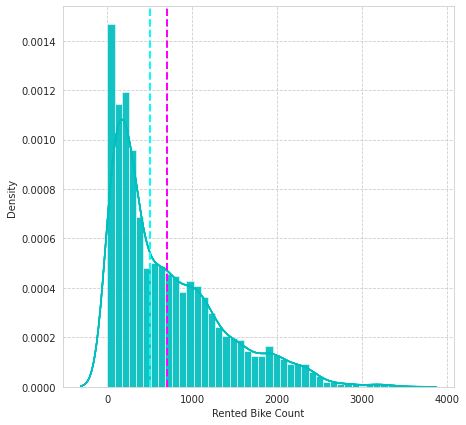

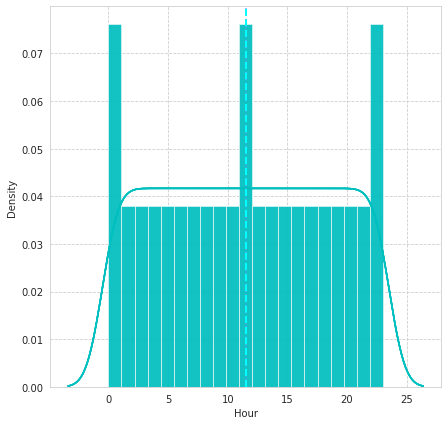

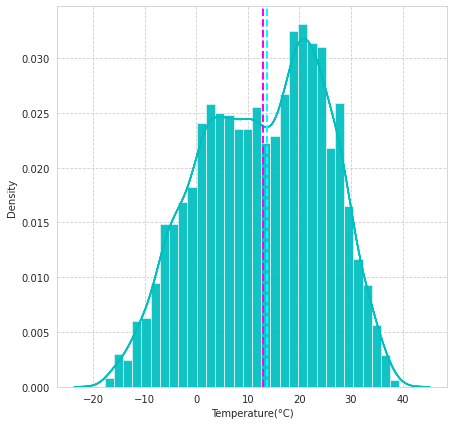

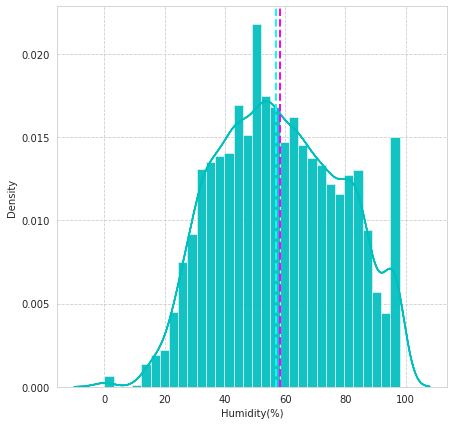

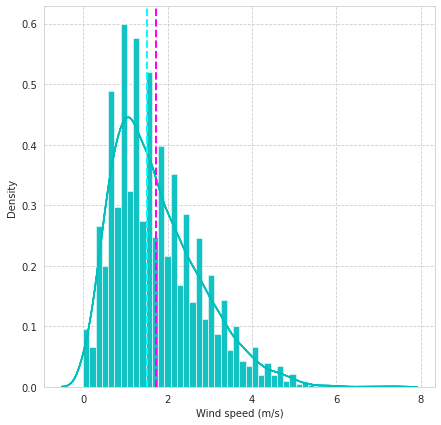

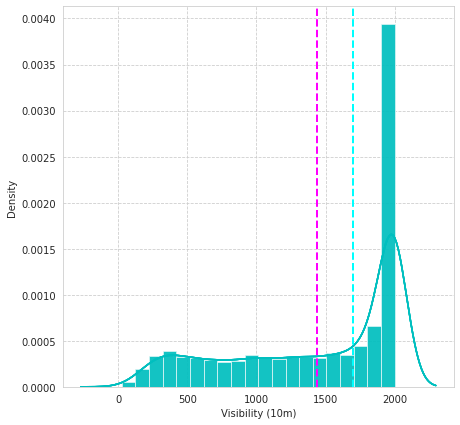

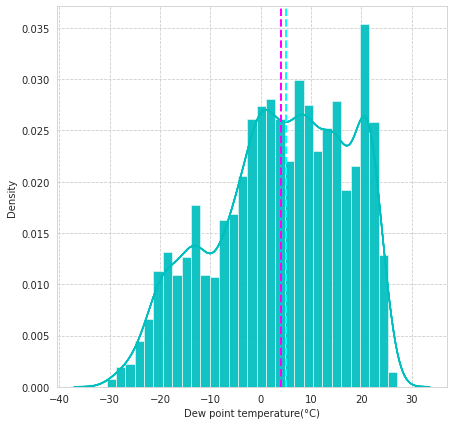

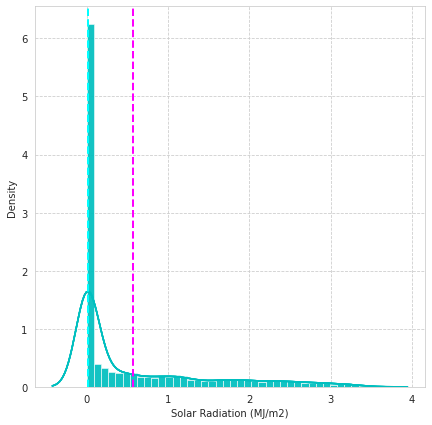

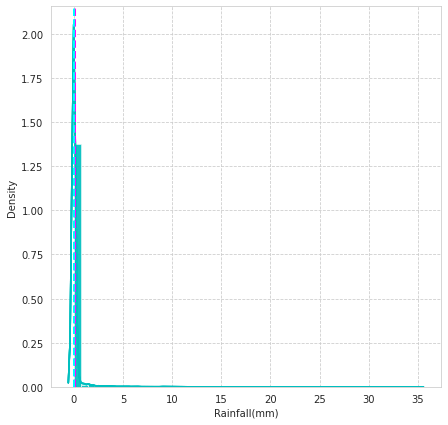

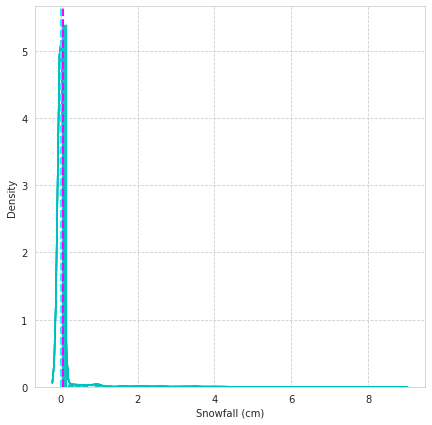

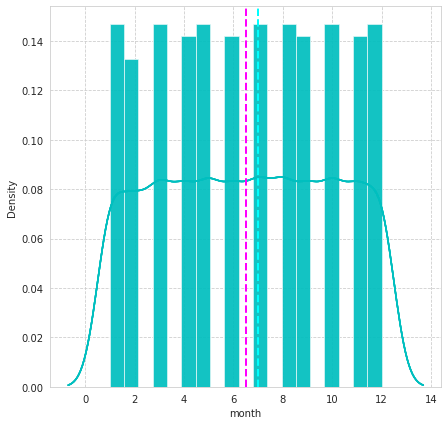

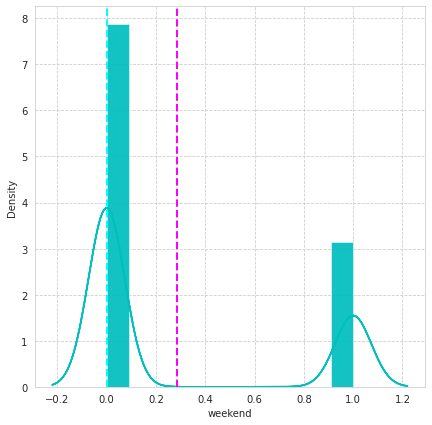

In [ ]:
#finding the mean and median of each variable by plotting  
for el in numeric_feature[:]:
  fig=plt.figure(figsize=(7,7))
  c = ['green', 'yellow', 'pink', 'maroon', 'orange']
  for i in c:
    sns.distplot(seoul_df[el],color='c')
  plt.axvline(seoul_df[el].mean(),color='magenta', linestyle='dashed',linewidth=2)
  plt.axvline(seoul_df[el].median(),color='cyan', linestyle='dashed',linewidth=2)
  plt.show()

* In density plot for **Rented Bike Count** we can see the median and mean lies in range of 500 to 1000 mean is slightly greater than median which means its positively skewed.
* In density plot for **Hour** we can see that median is equal to mean that is around 11 but since mode is not equal we cannot say it as unimodel but symmetrical since mean is equal to median.
* In density plot for **Temperature** we can see that median is greater than mean we can say to some extend that this is negatively skewed.
* In density plot for **Humidity** we can see that mean is greater than median we can say to some extend that this is positively skewed.
* In density plot for **WindSpeed** we can see that mean is greater than median we can say to some extend that this is positively skewed.
* In density plot for **Visibility** we can see that median is greater than mean we can say to some extend that this is negatively skewed.
* In density plot for **Dew Point Temperature** we can see that median is greater than mean we can say to some extend that this is negatively skewed.
* In density plot for **Solar Radiation** we can see that mean is greater than median we can say that this is positively skewed.


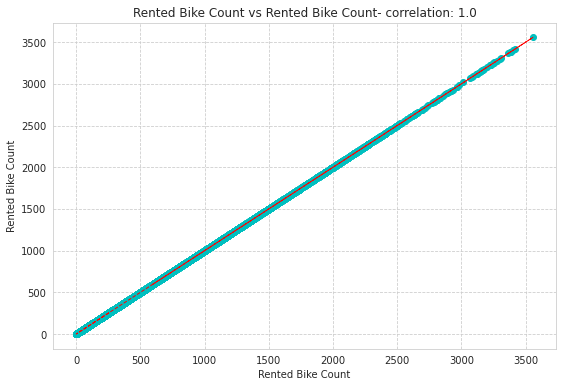

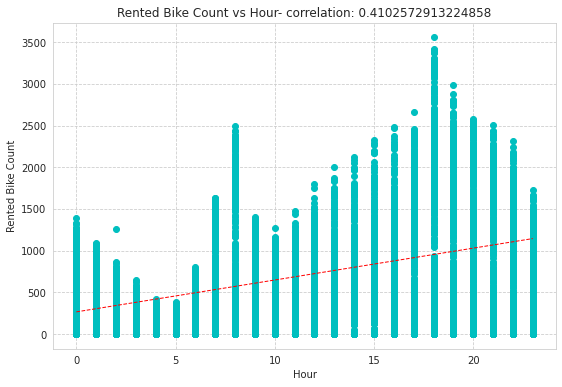

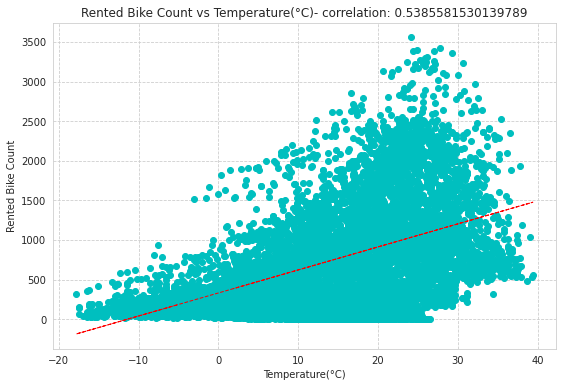

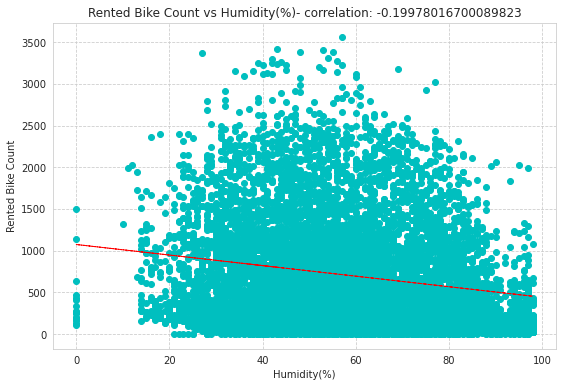

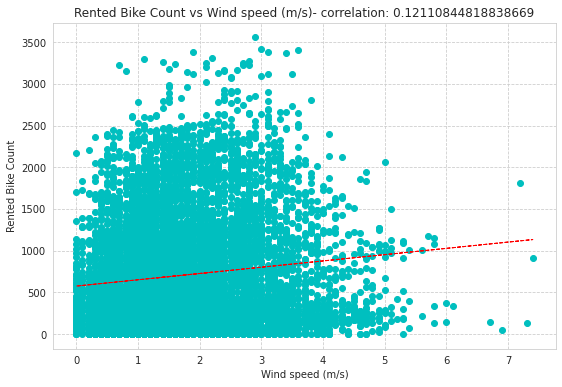

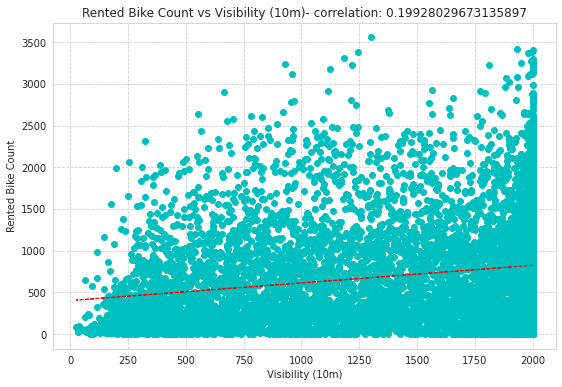

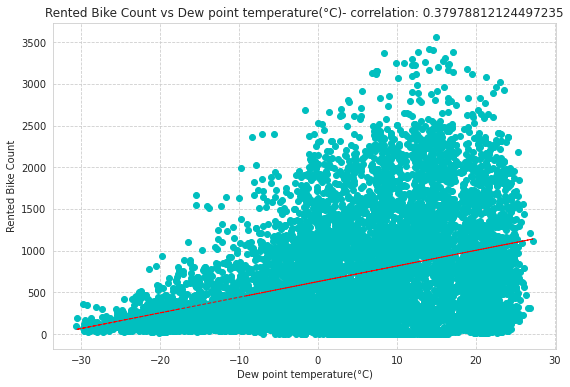

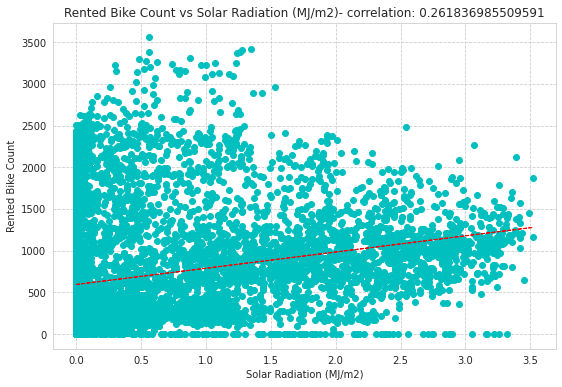

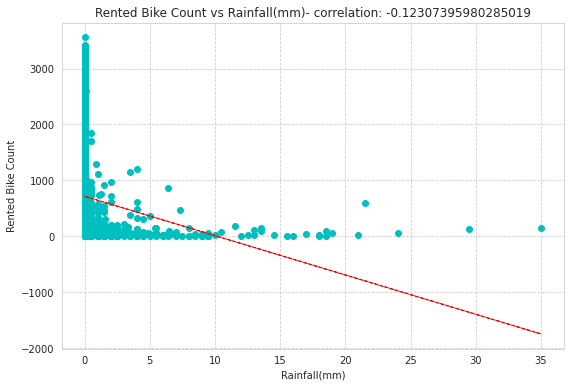

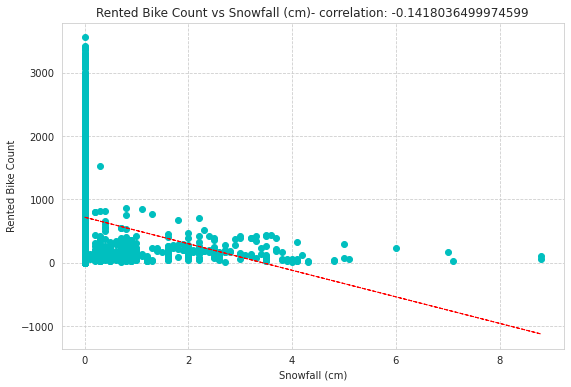

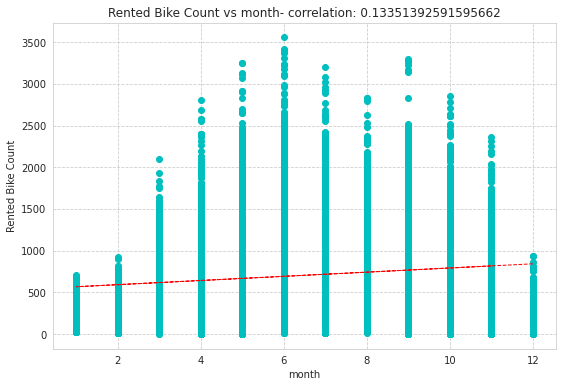

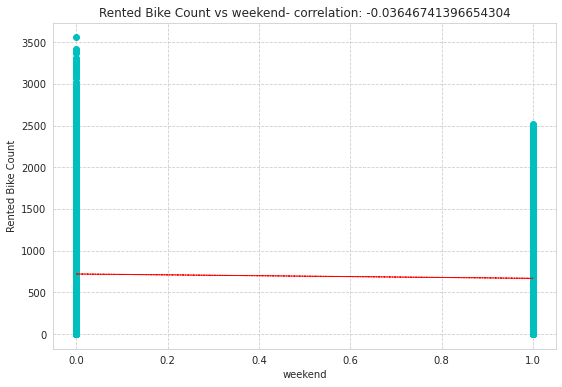

In [ ]:
#Using for loop to find the scatter plot between rented bike count vs numeric features so as to find the correlation between them
for ele in numeric_feature[2:]:   
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = seoul_df[ele]
    label = seoul_df['Rented Bike Count']
    correlation = feature.corr(label)
    c = ['green', 'yellow', 'pink', 'maroon', 'orange']
    plt.scatter(x=feature, y=label, color='c')
    plt.xlabel(ele)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + ele + '- correlation: ' + str(correlation))
    z = np.polyfit(seoul_df[ele],seoul_df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(seoul_df[ele])

    plt.plot(seoul_df[ele], y_hat, "r--", lw=1)

plt.show()

* From the **scatter plot** between **independent** variable and **dependent** variable we can conclude the following:
  * **Hour, Temperature,Visibility,Windspeed, Dew Point Temperature,Solar Radiation, month** have corelation greater than zero or in other words these independent variables are in positive correlation with the dependent variable **Rented Bike Count**.
  * Weekend,Snowfall,Rainfall, Humididty **bold text** are in negative corellation with the dependent variable **Rented Bike Count**.

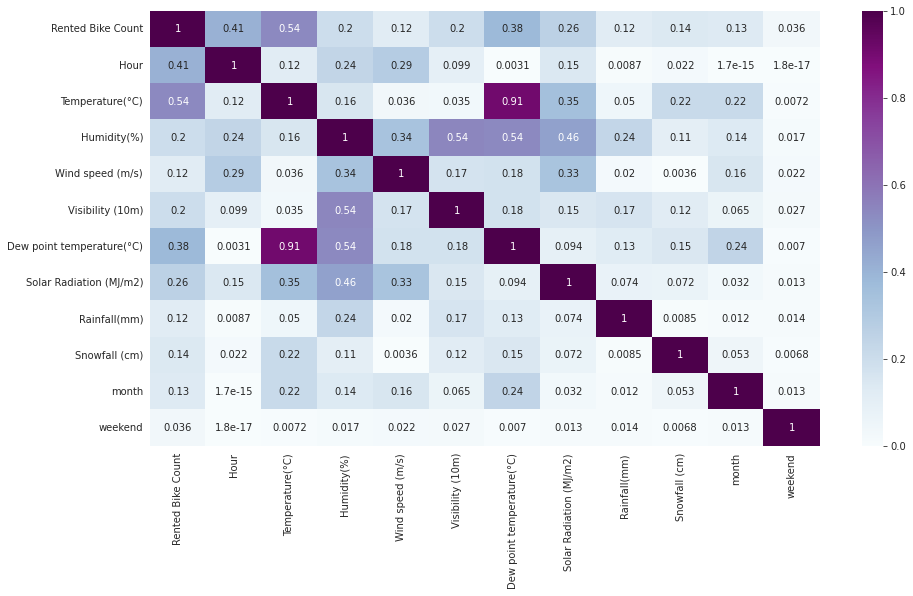

In [ ]:
#lets check the corellation between the independent variable using Heatmap

plt.figure(figsize=(15,8))
correlation = seoul_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap="BuPu")

##**Feature Selection and Engineering**

In [ ]:
#checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
#Calculating VIF to understand the corellation between independent variables 
calculate_vif(seoul_df[[i for i in seoul_df.describe().columns if i not in ['Rented Bike Count']]])

variables        VIF
0                        Hour   4.425348
1             Temperature(°C)  34.919399
2                 Humidity(%)   7.003058
3            Wind speed (m/s)   4.881602
4            Visibility (10m)   9.378738
5   Dew point temperature(°C)  17.802987
6     Solar Radiation (MJ/m2)   2.882967
7                Rainfall(mm)   1.082184
8               Snowfall (cm)   1.131902
9                       month   5.094506
10                    weekend   1.409771

In [ ]:
seoul_df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  month  \
0           0.0            0.0  Winter  No Holiday             Yes     12   
1           0.0            0.0  Winter  No Holiday             Yes     12   
2           0.0            0.0  Winter  No Holiday             Yes     12   
3           0.0            0.0  Winter  No Holiday             Yes     12   
4           0.0            0.0  Winter  No Holiday             Yes     12   

   weekend  
0        0  
1        0  
2        0  
3        0  
4        0

In [ ]:
#creating string dataframe to include only object type features 
string_features = seoul_df.select_dtypes(include=['object'])
string_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Seasons          8760 non-null   object
 1   Holiday          8760 non-null   object
 2   Functioning Day  8760 non-null   object
dtypes: object(3)
memory usage: 205.4+ KB


There are 8760 rows and 3 columns of object type features in string_features.

In [ ]:
numeric_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  month                      8760 non-null   int64  
 11  weekend                    8760 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 821.4 KB


There are 8760 rows and 12 columns of 6 float type and 6 integer type features in numeric_feature.

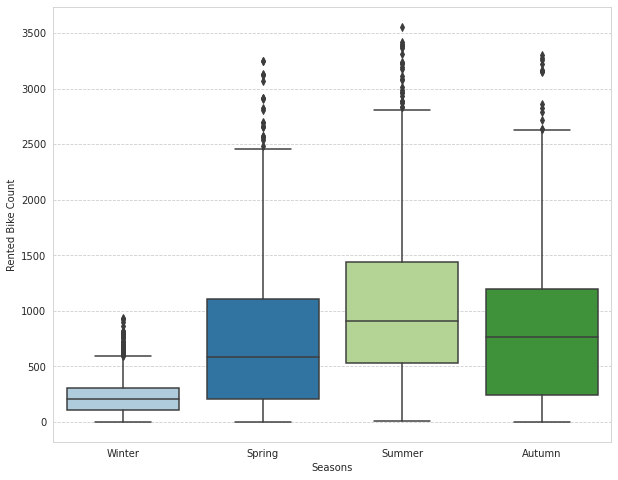

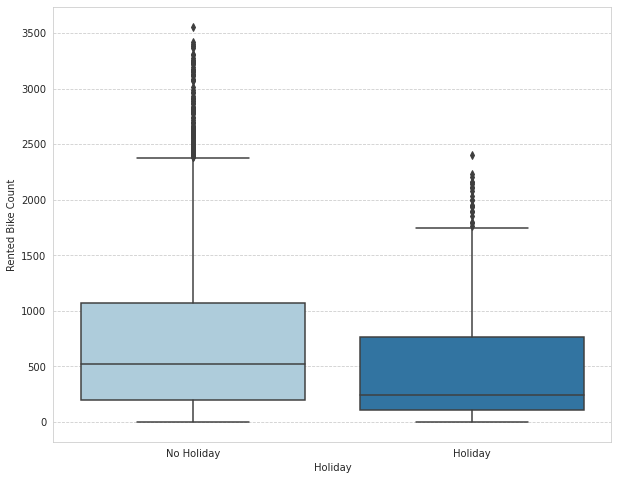

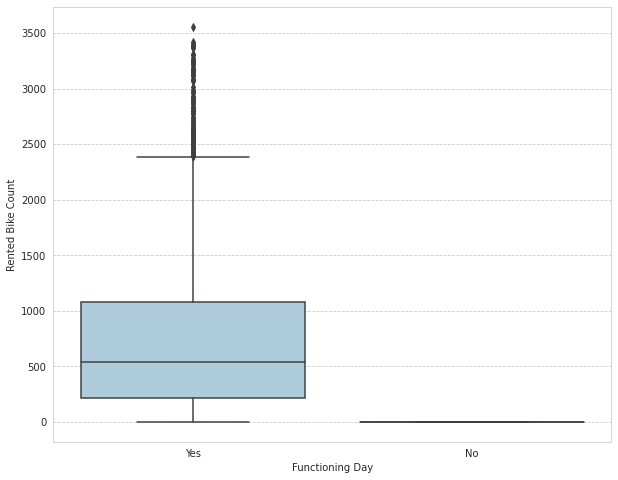

In [ ]:
#Using boxplot for each categorical Feature
for elem in string_features:
     plt.figure(figsize=(10,8))
     sns.boxplot(x=seoul_df[elem],y=seoul_df["Rented Bike Count"],palette="Paired")
     plt.show()

* From this **Box-plot rented bike vs categorical features** we can conclude the following:
   * In **season vs Rented Bike Count** we can clearly see that in summer Bike rented count was highest with 75% bike rented was around 1400 bike counts while 50% was 900 and 25% bike rented was around 550.
   * In **Holiday vs Rented Bike Count** we can clearly see that during no holiday bike rented was highest at the rate of 75% bike which is around 1100 bike count while 50% was around 550 and 25% was between 250 to 270.

<Figure size 1080x720 with 0 Axes>

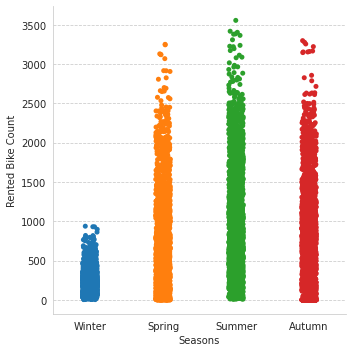

<Figure size 1080x720 with 0 Axes>

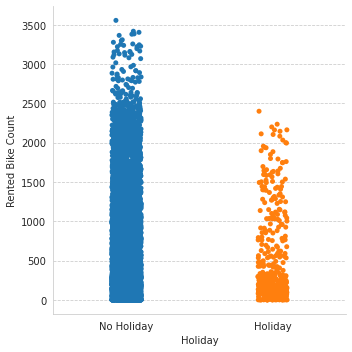

<Figure size 1080x720 with 0 Axes>

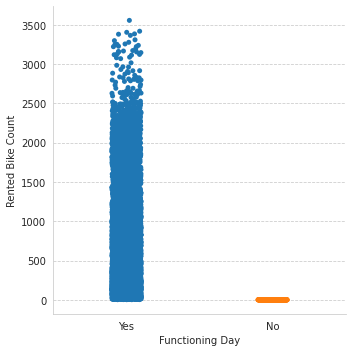

In [ ]:
#Using catplot to have broader observation 
for elem in string_features[:]:
     plt.figure(figsize=(15,10))
     sns.catplot(x=elem,y="Rented Bike Count",data=seoul_df)
     plt.show()

* From the catplot on Rented Bike Count vs Categorical Features we can conclude the following:
  * In summer season highest number of bike was rented as compared to other seasons with count touching at 3500 while in winter season lowest number of bike was rented touching the count of close to just 1000. From this we can assume that people tends to rent more bikes in summer as compare to other seasons also people tends to rent less bike in winter season. 
  * During working day people tends to rent more bikes as around 3500 from this we can assume that on holidays people tends to rent less bike.
  * Also we can see people tends to rent less or no bike during no functioning day.

In [ ]:
#creating a list of categorical feature to find the relation between rented bike count 
numeric_feature2=['Hour','Rainfall(mm)', 'Snowfall (cm)', 'month','weekend']
numeric_feature2

['Hour', 'Rainfall(mm)', 'Snowfall (cm)', 'month', 'weekend']

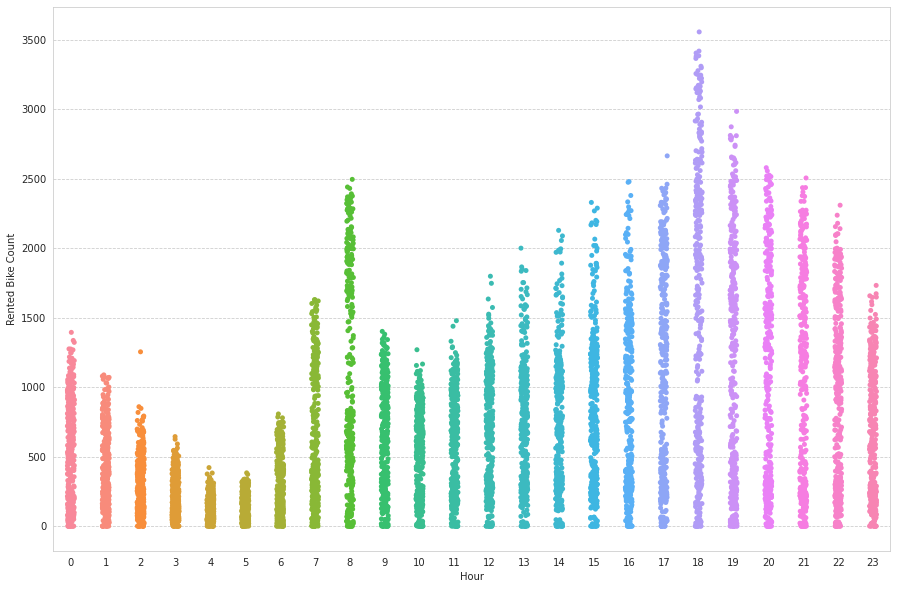

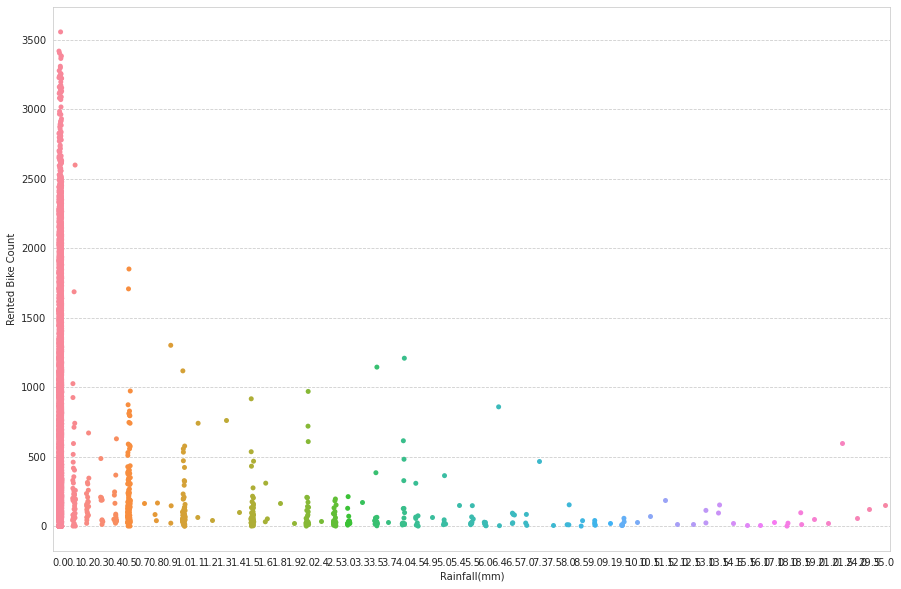

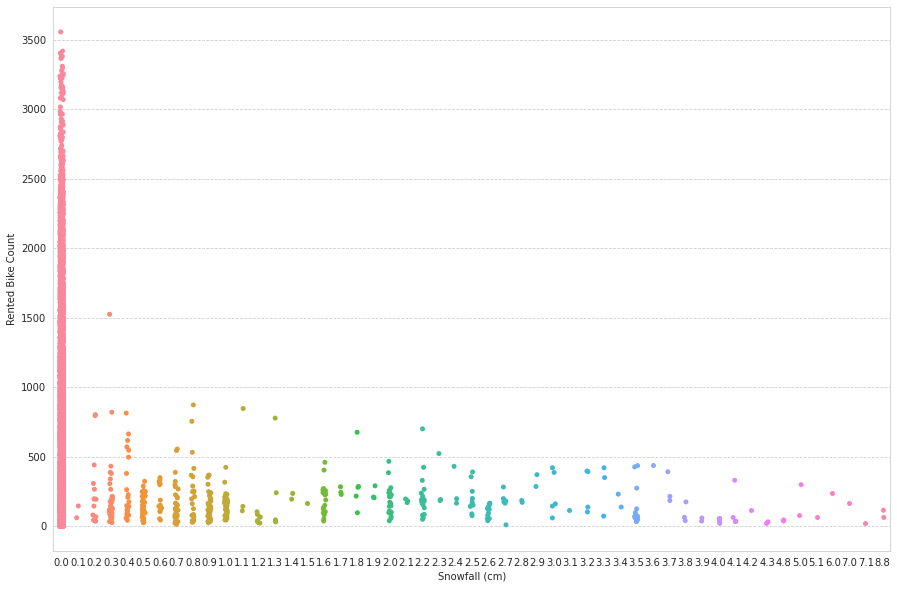

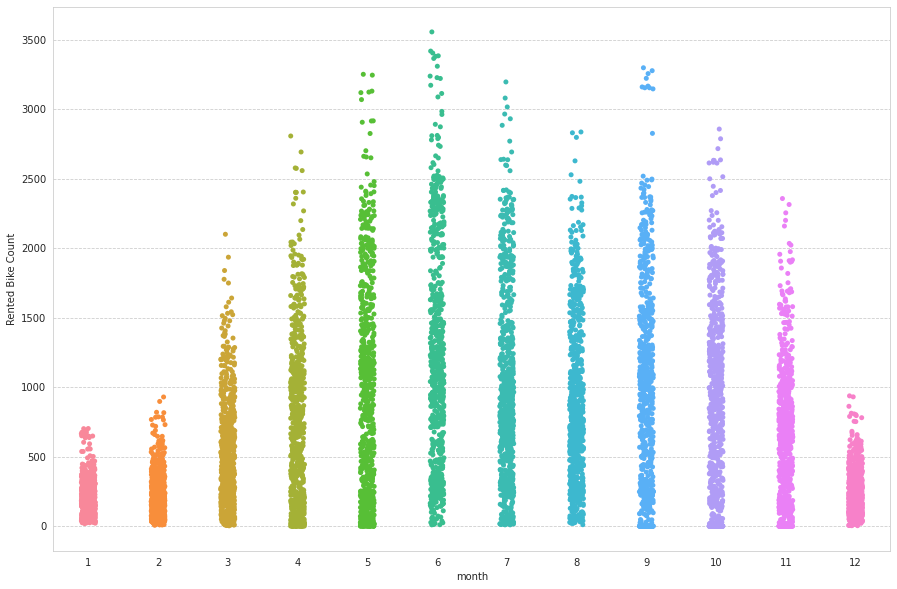

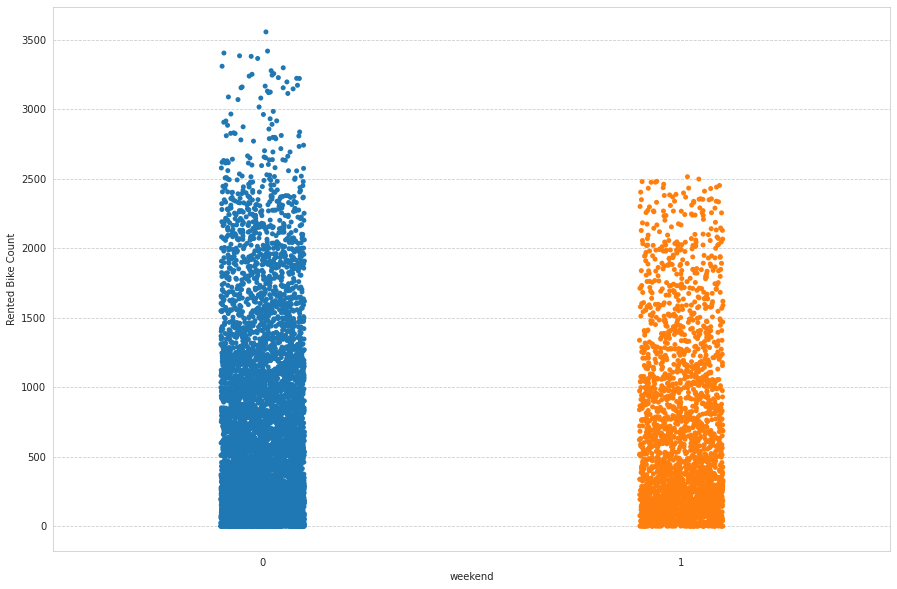

In [ ]:
#creating strpplot to get more elaborative observations
for elem2 in numeric_feature2:
  plt.figure(figsize=(15,10))
  sns.stripplot(x=elem2, y ='Rented Bike Count',data=seoul_df)
  plt.show()

* From the stripplot between **Rented bike count** vs selected categorical feature we can conclude the following:
   * In **Hour vs Rented Bike Count** we can see that during **18:00 Hrs(i.e 6:00 PM)** highest number of bike was rented as compared to **5:00 Hrs(i.e 5:00 AM)**. This means people tends to rent less bikes at early morning.
   * In **Rainfall vs Rented Bike Count** and similarly with **Snowfall vs Rented Bike Count**  we can see that people tend to rent highest number of bikes during **0.00mm** of Rainfall or no rainfall and **0.00cm of snowfall or no snowfall** as compared to when there is actully rainfall or snowfall. In other words people rent less bikes or no bikes with the increase of **rainfall or snowfall**.
   * In **month vs Rented Bike Count** we can see that people tends to rent more bike in **6 or june** month as compared to less bike during dec or january.From this we can assume that people tends to rent more bikes **in summer as compared to winter**.
   * In **weekend vs Rented Bike count** we can see that people tends to rent more bike during weekdays as compared to weekends.


##**Let's see relationship between Categorical Feature vs Avg Bike rented**

In [ ]:
#creating list of numeric feature for selected features
numeric_feature3=['Hour','month']

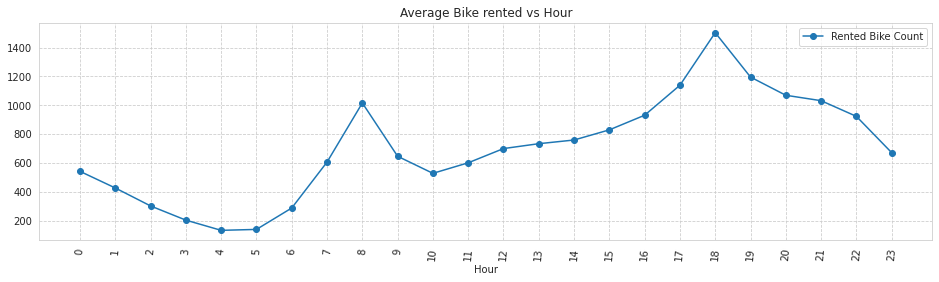

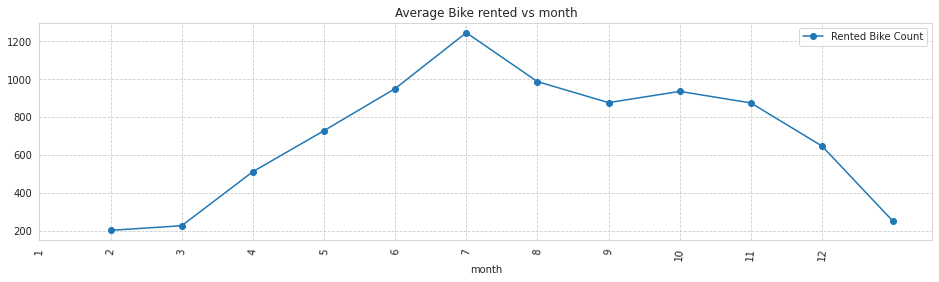

In [ ]:
#creating for loop to get line plot for selected numeric feature hour and month
for fea in numeric_feature3:
 

  avg_bike=seoul_df.groupby(fea)['Rented Bike Count'].mean()
  plt.figure(figsize=(16,4))
  s=avg_bike.plot(legend=True, marker='o',title=f'Average Bike rented vs {fea}')
  s.set_xticks(range(len(avg_bike)))
  s.set_xticklabels(avg_bike.index.tolist(),rotation = 85)
  plt.show()

From this visualizalisation we can conclude the following:
   * In **Average Bike Rented vs Hour** we can clearly see that at 6:00 PM average number of bike rented by the people was **1550**. While at **00.00 or at midnight** average bike rented was lowest with just around **550 bikes**.
   * In **Average Bike Rented vs Month** we can clearly see that Average Bike rented in **July** was highest around **1250** and Average Bike Rented during month of **February** was the Lowest with just **200** average bike.

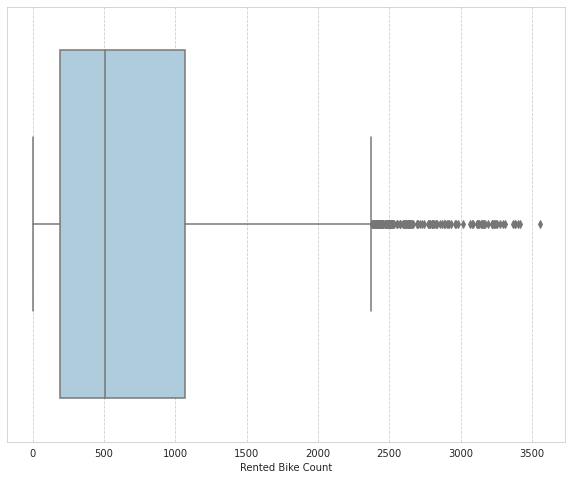

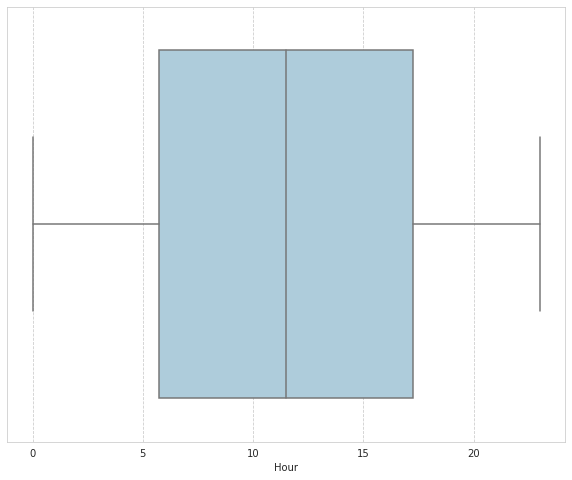

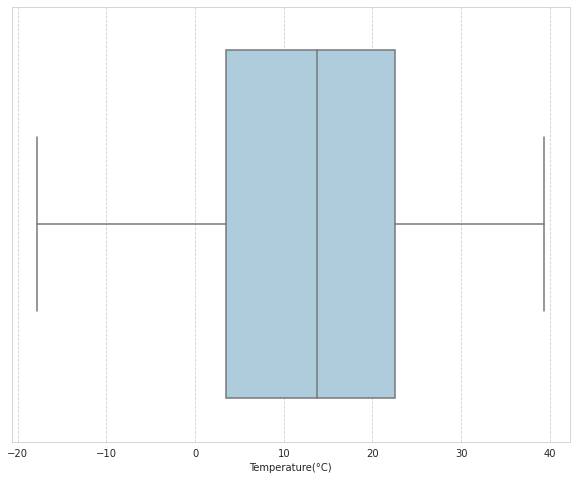

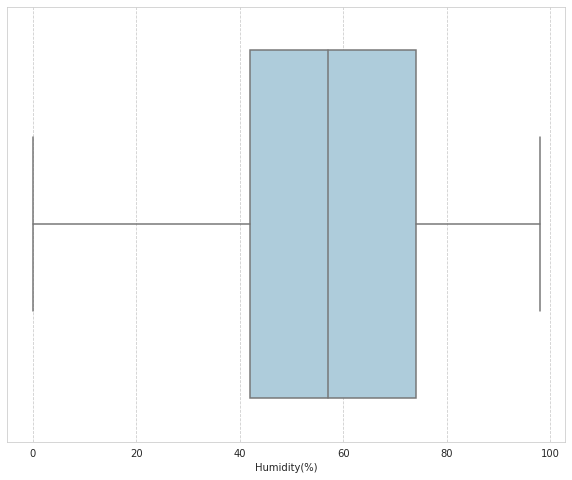

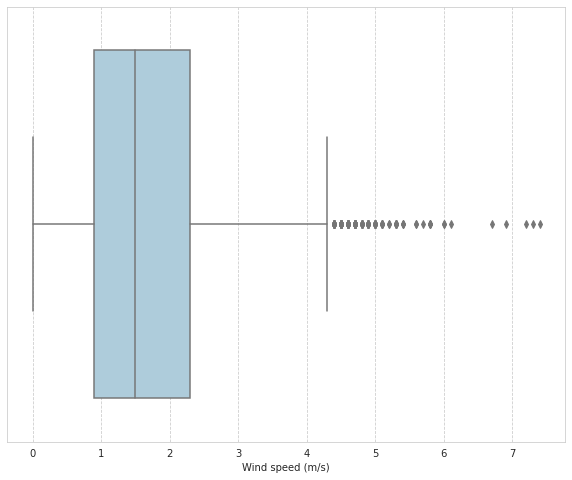

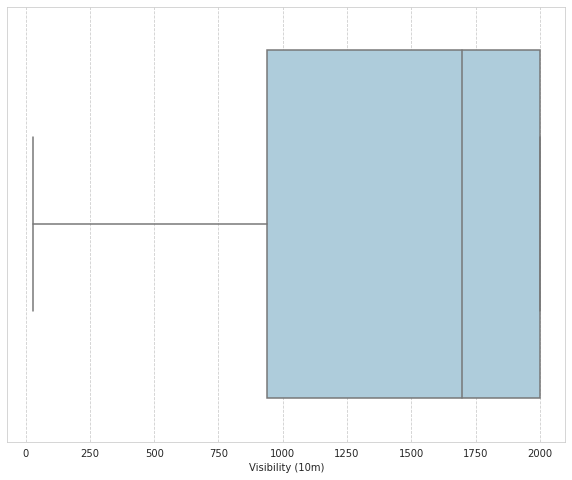

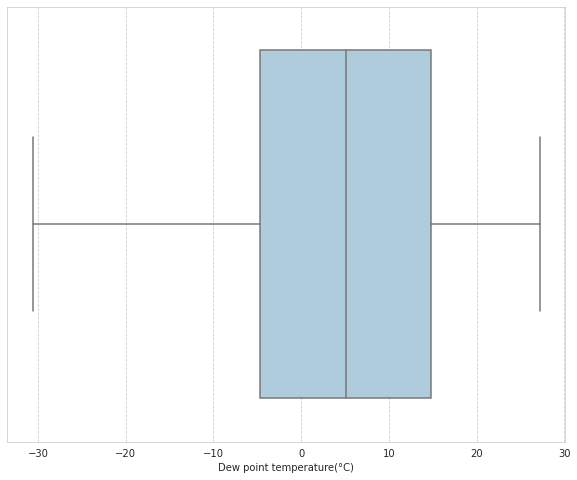

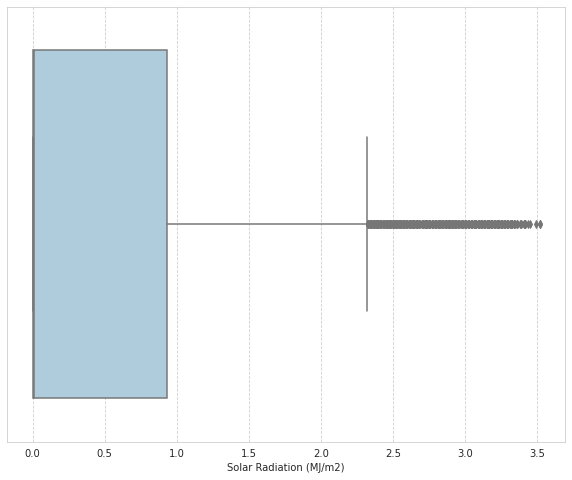

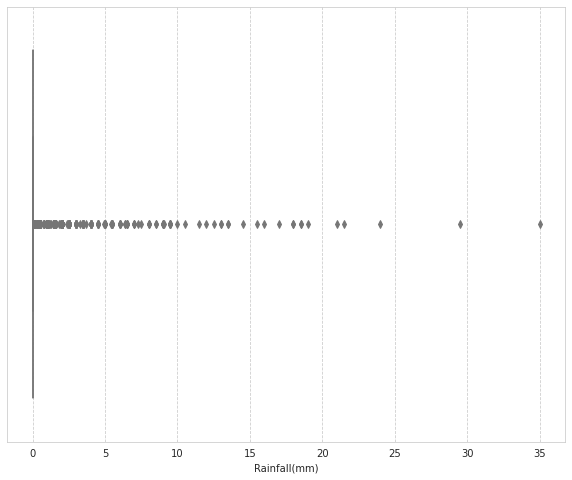

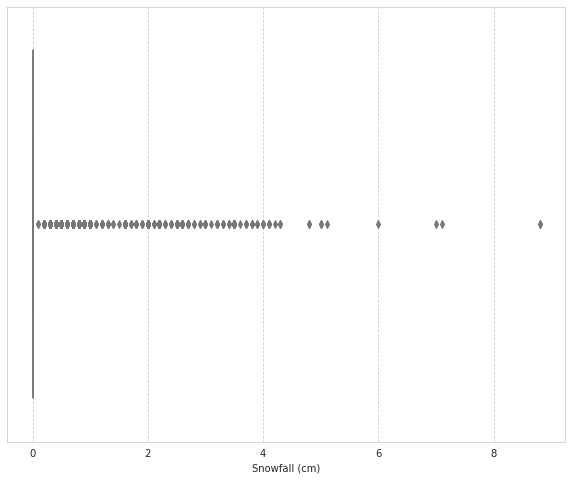

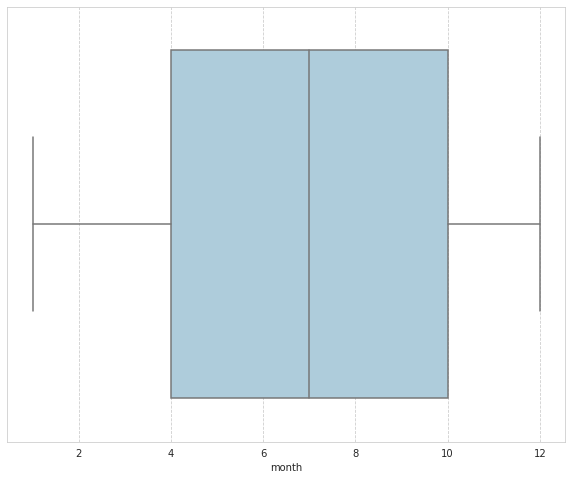

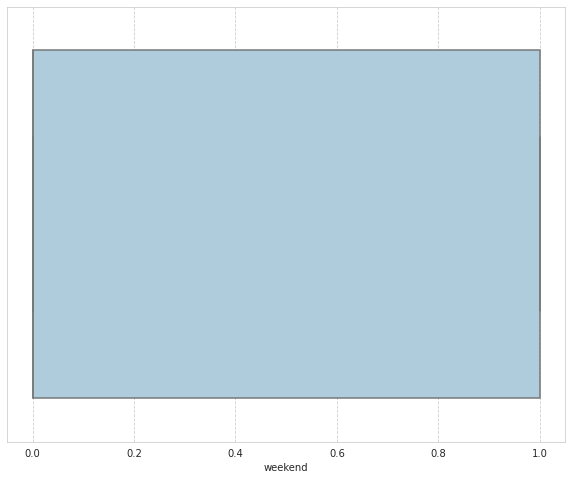

In [ ]:
#Let get boxplot for each numberical Feature
for elem in numeric_feature[1:]:
    plt.figure(figsize=(10,8))
    sns.boxplot(x=seoul_df[elem],palette="Paired")
    plt.xlabel(elem)
plt.show()

In [ ]:
# #Checking the outliers in Solar Radiation features
# Q1=seoul_df['Solar Radiation (MJ/m2)'].quantile(0.25)
# Q3=seoul_df['Solar Radiation (MJ/m2)'].quantile(0.75)
# IQR=Q3-Q1
# print(Q1)
# print(Q3)
# print(IQR)
# Lower_Whisker = Q1 - (1.5*IQR)
# Upper_Whisker = Q3 + (1.5*IQR)
# print(Lower_Whisker, Upper_Whisker)


In [ ]:
# #outliers can be any points below Lower or upper whiskers
# seoul_df = seoul_df[seoul_df['Solar Radiation (MJ/m2)']< Upper_Whisker]

Here as we can see above 90 of the data in rainfall belong to 0.0 which in way hamper our modelling during training and testing as most of the results in overfitting and poor test results same in case of snowfall as we can see.

In [ ]:
# #Checking the outliers in Wind Speed features
# Q1=seoul_df['Wind speed (m/s)'].quantile(0.25)
# Q3=seoul_df['Wind speed (m/s)'].quantile(0.75)
# IQR=Q3-Q1
# print(Q1)
# print(Q3)
# print(IQR)
# Lower_Whisker = Q1 - (1.5*IQR)
# Upper_Whisker = Q3 + (1.5*IQR)
# print(Lower_Whisker, Upper_Whisker)


In [ ]:
# #outliers can be any points below Lower or upper whiskers
# seoul_df = seoul_df[seoul_df['Wind speed (m/s)']< Upper_Whisker]

In [ ]:
#getting to know about the shape of the dataset
seoul_df.shape

(8760, 15)

In [ ]:
#checking the columns of the dataset
seoul_df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'weekend'],
      dtype='object')

In [ ]:
#creating the dataframe to store the numeric feature
numeric_feature=seoul_df.select_dtypes(include='number')
numeric_feature

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254     0             -5.2           37               2.2   
1                   204     1             -5.5           38               0.8   
2                   173     2             -6.0           39               1.0   
3                   107     3             -6.2           40               0.9   
4                    78     4             -6.0           36               2.3   
...                 ...   ...              ...          ...               ...   
8755               1003    19              4.2           34               2.6   
8756                764    20              3.4           37               2.3   
8757                694    21              2.6           39               0.3   
8758                712    22              2.1           41               1.0   
8759                584    23              1.9           43               1.3   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0                 2000                      -17.6                      0.0   
1                 2000                      -17.6                      0.0   
2                 2000                      -17.7                      0.0   
3                 2000                      -17.6                      0.0   
4                 2000                      -18.6                      0.0   
...                ...                        ...                      ...   
8755              1894                      -10.3                      0.0   
8756              2000                       -9.9                      0.0   
8757              1968                       -9.9                      0.0   
8758              1859                       -9.8                      0.0   
8759              1909                       -9.3                      0.0   

      Rainfall(mm)  Snowfall (cm)  month  weekend  
0              0.0            0.0     12        0  
1              0.0            0.0     12        0  
2              0.0            0.0     12        0  
3              0.0            0.0     12        0  
4              0.0            0.0     12        0  
...            ...            ...    ...      ...  
8755           0.0            0.0     11        0  
8756           0.0            0.0     11        0  
8757           0.0            0.0     11        0  
8758           0.0            0.0     11        0  
8759           0.0            0.0     11        0  

[8760 rows x 12 columns]

In [ ]:
#checking the value count for season feature
string_features['Seasons'].value_counts()


Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

#**Data Preparation**

In [ ]:
#getting the shape of dataset
seoul_df.shape

(8760, 15)

##**Creating Dummy Variables**


In [ ]:
#Using one_hot encoding to create a dummy variable to store the categorical features
dum_cat=pd.get_dummies(string_features,drop_first=False)
dum_cat

Seasons_Autumn  Seasons_Spring  Seasons_Summer  Seasons_Winter  \
0                  0               0               0               1   
1                  0               0               0               1   
2                  0               0               0               1   
3                  0               0               0               1   
4                  0               0               0               1   
...              ...             ...             ...             ...   
8755               1               0               0               0   
8756               1               0               0               0   
8757               1               0               0               0   
8758               1               0               0               0   
8759               1               0               0               0   

      Holiday_Holiday  Holiday_No Holiday  Functioning Day_No  \
0                   0                   1                   0   
1                   0                   1                   0   
2                   0                   1                   0   
3                   0                   1                   0   
4                   0                   1                   0   
...               ...                 ...                 ...   
8755                0                   1                   0   
8756                0                   1                   0   
8757                0                   1                   0   
8758                0                   1                   0   
8759                0                   1                   0   

      Functioning Day_Yes  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
...                   ...  
8755                    1  
8756                    1  
8757                    1  
8758                    1  
8759                    1  

[8760 rows x 8 columns]

In [ ]:
numeric_feature

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254     0             -5.2           37               2.2   
1                   204     1             -5.5           38               0.8   
2                   173     2             -6.0           39               1.0   
3                   107     3             -6.2           40               0.9   
4                    78     4             -6.0           36               2.3   
...                 ...   ...              ...          ...               ...   
8755               1003    19              4.2           34               2.6   
8756                764    20              3.4           37               2.3   
8757                694    21              2.6           39               0.3   
8758                712    22              2.1           41               1.0   
8759                584    23              1.9           43               1.3   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0                 2000                      -17.6                      0.0   
1                 2000                      -17.6                      0.0   
2                 2000                      -17.7                      0.0   
3                 2000                      -17.6                      0.0   
4                 2000                      -18.6                      0.0   
...                ...                        ...                      ...   
8755              1894                      -10.3                      0.0   
8756              2000                       -9.9                      0.0   
8757              1968                       -9.9                      0.0   
8758              1859                       -9.8                      0.0   
8759              1909                       -9.3                      0.0   

      Rainfall(mm)  Snowfall (cm)  month  weekend  
0              0.0            0.0     12        0  
1              0.0            0.0     12        0  
2              0.0            0.0     12        0  
3              0.0            0.0     12        0  
4              0.0            0.0     12        0  
...            ...            ...    ...      ...  
8755           0.0            0.0     11        0  
8756           0.0            0.0     11        0  
8757           0.0            0.0     11        0  
8758           0.0            0.0     11        0  
8759           0.0            0.0     11        0  

[8760 rows x 12 columns]

In [ ]:
#concatening all the numeric as well as dummy categorical feature to have the final dataframe
seoul_final_df=pd.concat([dum_cat,numeric_feature],axis=1)
seoul_final_df

Seasons_Autumn  Seasons_Spring  Seasons_Summer  Seasons_Winter  \
0                  0               0               0               1   
1                  0               0               0               1   
2                  0               0               0               1   
3                  0               0               0               1   
4                  0               0               0               1   
...              ...             ...             ...             ...   
8755               1               0               0               0   
8756               1               0               0               0   
8757               1               0               0               0   
8758               1               0               0               0   
8759               1               0               0               0   

      Holiday_Holiday  Holiday_No Holiday  Functioning Day_No  \
0                   0                   1                   0   
1                   0                   1                   0   
2                   0                   1                   0   
3                   0                   1                   0   
4                   0                   1                   0   
...               ...                 ...                 ...   
8755                0                   1                   0   
8756                0                   1                   0   
8757                0                   1                   0   
8758                0                   1                   0   
8759                0                   1                   0   

      Functioning Day_Yes  Rented Bike Count  Hour  Temperature(°C)  \
0                       1                254     0             -5.2   
1                       1                204     1             -5.5   
2                       1                173     2             -6.0   
3                       1                107     3             -6.2   
4                       1                 78     4             -6.0   
...                   ...                ...   ...              ...   
8755                    1               1003    19              4.2   
8756                    1                764    20              3.4   
8757                    1                694    21              2.6   
8758                    1                712    22              2.1   
8759                    1                584    23              1.9   

      Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0              37               2.2              2000   
1              38               0.8              2000   
2              39               1.0              2000   
3              40               0.9              2000   
4              36               2.3              2000   
...           ...               ...               ...   
8755           34               2.6              1894   
8756           37               2.3              2000   
8757           39               0.3              1968   
8758           41               1.0              1859   
8759           43               1.3              1909   

      Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                         -17.6                      0.0           0.0   
1                         -17.6                      0.0           0.0   
2                         -17.7                      0.0           0.0   
3                         -17.6                      0.0           0.0   
4                         -18.6                      0.0           0.0   
...                         ...                      ...           ...   
8755                      -10.3                      0.0           0.0   
8756                       -9.9                      0.0           0.0   
8757                       -9.9                      0.0           0.0   
8758                       -9.8                      0.0           0.0   
8759    

In [ ]:
#Dropping the non required features from the final dataset
seoul_final_df=seoul_final_df.drop(columns=['Holiday_No Holiday','Functioning Day_No'],axis=1)
seoul_final_df

Seasons_Autumn  Seasons_Spring  Seasons_Summer  Seasons_Winter  \
0                  0               0               0               1   
1                  0               0               0               1   
2                  0               0               0               1   
3                  0               0               0               1   
4                  0               0               0               1   
...              ...             ...             ...             ...   
8755               1               0               0               0   
8756               1               0               0               0   
8757               1               0               0               0   
8758               1               0               0               0   
8759               1               0               0               0   

      Holiday_Holiday  Functioning Day_Yes  Rented Bike Count  Hour  \
0                   0                    1                254     0   
1                   0                    1                204     1   
2                   0                    1                173     2   
3                   0                    1                107     3   
4                   0                    1                 78     4   
...               ...                  ...                ...   ...   
8755                0                    1               1003    19   
8756                0                    1                764    20   
8757                0                    1                694    21   
8758                0                    1                712    22   
8759                0                    1                584    23   

      Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0                -5.2           37               2.2              2000   
1                -5.5           38               0.8              2000   
2                -6.0           39               1.0              2000   
3                -6.2           40               0.9              2000   
4                -6.0           36               2.3              2000   
...               ...          ...               ...               ...   
8755              4.2           34               2.6              1894   
8756              3.4           37               2.3              2000   
8757              2.6           39               0.3              1968   
8758              2.1           41               1.0              1859   
8759              1.9           43               1.3              1909   

      Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                         -17.6                      0.0           0.0   
1                         -17.6                      0.0           0.0   
2                         -17.7                      0.0           0.0   
3                         -17.6                      0.0           0.0   
4                         -18.6                      0.0           0.0   
...                         ...                      ...           ...   
8755                      -10.3                      0.0           0.0   
8756                       -9.9                      0.0           0.0   
8757                       -9.9                      0.0           0.0   
8758                       -9.8                      0.0           0.0   
8759                       -9.3                      0.0           0.0   

      Snowfall (cm)  month  weekend  
0               0.0     12        0  
1               0.0     12        0  
2               0.0     12        0  
3               0.0     12        0  
4               0.0     12        0  
...             ...    ...      ...  
8755            0.0     11        0  
8756            0.0     11        0  
8757            0.0     11        0  
8758            0.0     11        0  
8759            0.0     11        0  

[8760 rows x 18 columns]

In [ ]:
#checking the information about the dataset
seoul_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Seasons_Autumn             8760 non-null   uint8  
 1   Seasons_Spring             8760 non-null   uint8  
 2   Seasons_Summer             8760 non-null   uint8  
 3   Seasons_Winter             8760 non-null   uint8  
 4   Holiday_Holiday            8760 non-null   uint8  
 5   Functioning Day_Yes        8760 non-null   uint8  
 6   Rented Bike Count          8760 non-null   int64  
 7   Hour                       8760 non-null   int64  
 8   Temperature(°C)            8760 non-null   float64
 9   Humidity(%)                8760 non-null   int64  
 10  Wind speed (m/s)           8760 non-null   float64
 11  Visibility (10m)           8760 non-null   int64  
 12  Dew point temperature(°C)  8760 non-null   float64
 13  Solar Radiation (MJ/m2)    8760 non-null   float

In [ ]:
seoul_final_df.shape



(8760, 18)

In [ ]:
#using transpose method so to have fature as rows as information as column to have better understandability about the dataset
seoul_final_df.describe().transpose()

count         mean         std   min     25%  \
Seasons_Autumn             8760.0     0.249315    0.432641   0.0    0.00   
Seasons_Spring             8760.0     0.252055    0.434217   0.0    0.00   
Seasons_Summer             8760.0     0.252055    0.434217   0.0    0.00   
Seasons_Winter             8760.0     0.246575    0.431042   0.0    0.00   
Holiday_Holiday            8760.0     0.049315    0.216537   0.0    0.00   
Functioning Day_Yes        8760.0     0.966324    0.180404   0.0    1.00   
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   
month                      8760.0     6.526027    3.448048   1.0    4.00   
weekend                    8760.0     0.284932    0.451408   0.0    0.00   

                               50%      75%      max  
Seasons_Autumn                0.00     0.00     1.00  
Seasons_Spring                0.00     1.00     1.00  
Seasons_Summer                0.00     1.00     1.00  
Seasons_Winter                0.00     0.00     1.00  
Holiday_Holiday               0.00     0.00     1.00  
Functioning Day_Yes           1.00     1.00     1.00  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80  
month                         7.00    10.00    12.00  
weekend                       0.00     1.00     1.00

In [ ]:
#cheching info
seoul_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Seasons_Autumn             8760 non-null   uint8  
 1   Seasons_Spring             8760 non-null   uint8  
 2   Seasons_Summer             8760 non-null   uint8  
 3   Seasons_Winter             8760 non-null   uint8  
 4   Holiday_Holiday            8760 non-null   uint8  
 5   Functioning Day_Yes        8760 non-null   uint8  
 6   Rented Bike Count          8760 non-null   int64  
 7   Hour                       8760 non-null   int64  
 8   Temperature(°C)            8760 non-null   float64
 9   Humidity(%)                8760 non-null   int64  
 10  Wind speed (m/s)           8760 non-null   float64
 11  Visibility (10m)           8760 non-null   int64  
 12  Dew point temperature(°C)  8760 non-null   float64
 13  Solar Radiation (MJ/m2)    8760 non-null   float

In [ ]:
#calling calculate_vif function to calculate the VIF so to collinearity between the independent variable 
calculate_vif(seoul_final_df[[i for i in seoul_final_df.describe().columns if i not in ['Rented Bike Count']]])

variables         VIF
0              Seasons_Autumn  111.300627
1              Seasons_Spring  110.939221
2              Seasons_Summer  115.096071
3              Seasons_Winter  106.461934
4             Holiday_Holiday    1.028401
5         Functioning Day_Yes    1.082701
6                        Hour    1.210192
7             Temperature(°C)   89.970995
8                 Humidity(%)   20.624928
9            Wind speed (m/s)    1.307475
10           Visibility (10m)    1.691801
11  Dew point temperature(°C)  117.820921
12    Solar Radiation (MJ/m2)    2.035328
13               Rainfall(mm)    1.085795
14              Snowfall (cm)    1.130726
15                      month    1.830791
16                    weekend    1.011350

We can see that Dew Point temperature has the Highest VIF OF 117.82 which is highly collinear in fact showing multicollinearity so we have to drop this feature and check VIF again. 

##**Let's create functions so to calculate scores and to train Linear models**

In [ ]:
#creating list to store evalustion matrices of all the models
mse_list=[]
rmse_list=[]
r2_list=[]
adjusted_r2_list=[]

In [ ]:
#create functions so to train and also to evaluate all linear models

def linearModel_train(model, X_train,y_train,X_test,y_test):

  #model training
  model.fit(X_train,y_train)

  #value pediction
  pred_value=model.predict(X_test)
  
 
  #mean squarred error 
  MSE = mean_squared_error(y_test**2,pred_value**2)
  print("MSE :" , MSE)

  #root mean square error
  RMSE = np.sqrt(MSE)
  print('RMSE :', RMSE)

  #r2  square
  r2 = r2_score(y_test**2,pred_value**2)
  print('R2 :', r2)

  #Adjusted r2 score
  adjusted_r2=1-(1-r2_score(y_test**2,pred_value**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adjusted_r2)
 
  #adding scores to lists
  mse_list.append(MSE)
  rmse_list.append(RMSE)
  r2_list.append(r2)
  adjusted_r2_list.append(adjusted_r2)

##**Lets create function to evaluate metrices for tree and ensemble models** 

In [ ]:
from sklearn import linear_model
def tree_ensemble_model(model, X_train,y_train,X_test,y_test):

  #model training
  model.fit(X_train,y_train)

  #value pediction
  preds_value=model.predict(X_test)
  
  
  #mean squarred error 
  MSE = mean_squared_error(y_test,preds_value)
  print("MSE :" , MSE)

  #root mean square error
  RMSE = np.sqrt(MSE)
  print('RMSE :', RMSE)

  #r2  square
  r2 = r2_score(y_test,preds_value)
  print('R2 :', r2)

  #Adjusted r2 score
  adjusted_r2=1-(1-r2_score(y_test,preds_value))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adjusted_r2)

 #adding scores to lists
  mse_list.append(MSE)
  rmse_list.append(RMSE)
  r2_list.append(r2)
  adjusted_r2_list.append(adjusted_r2) 

##**Creating Function to get graph for Linear,tree,ensemble based model**

In [ ]:
 #plotting evaluation metrices to graph
def get_linear_graph(model, X_train,y_train,X_test,y_test):
  model.fit(X_train,y_train)
  pred_value=model.predict(X_test) 
  plt.figure(figsize=(20,10))
  plt.plot(pred_value[:100])
  plt.plot(np.array(y_test[:100]))
  plt.legend(['Predicted','Actual'])
  plt.show()

In [ ]:
 #plotting evaluation graph
def get_graph(model, X_train,y_train,X_test,y_test):
  model.fit(X_train,y_train)
  preds_value=model.predict(X_test)
  plt.figure(figsize=(20,10))
  plt.plot(np.array(y_test[:100]))
  plt.plot(preds_value[:100])
  plt.legend(['Actual','Predicted'],prop={'size': 20})
  plt.show()

##**Creating Function to get Shap summary**

In [ ]:
def get_shap_summary(model):
  model.fit(X_train,y_train)
  explainer = shap.TreeExplainer(model)
  shap_values=explainer.shap_values(X_train,check_additivity=False)
  return shap.summary_plot(shap_values, X_train)
  return shap.summary_plot(shap_values, X_train, plot_type="bar")

##**Let's create function to get feature importance**

In [ ]:
def get_feat_imp(model,X_train):

  features = X_train.columns
  importances = model.feature_importances_
  indices = np.argsort(importances)
  c = ['green', 'yellow', 'pink', 'maroon', 'orange']
  plt.figure(figsize=(15,10),dpi=100)
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color=c,align='center')
  plt.yticks(range(len(indices)), [features[i]  for i in indices])
  plt.xlabel('Relative Importance')
  plt.xticks(rotation = 90)

  plt.show()

In [ ]:
!pip install lime

In [ ]:
import lime
import lime.lime_tabular

def Lime_Tabular_explainer(model, X_train,y_train,X_test,y_test):
  X = X_test
  feature_names=list(X_test.columns)

  explainer = lime.lime_tabular.LimeTabularExplainer(X.values,feature_names=feature_names,mode='regression')

  choosen_instance= X.reset_index(drop=True).loc[[instance]].values[0]
  exp = explainer.explain_instance(choosen_instance, model.predict, num_features= num_features)
  exp.show_in_notebook(show_table=True)
  

##**Train | Test Split for Linear Regression**

In [ ]:
X=seoul_final_df.drop(['Rented Bike Count','Dew point temperature(°C)'],axis = 1)

In [ ]:
X.shape

(8760, 16)

In [ ]:
y=np.sqrt(seoul_final_df['Rented Bike Count'])

In [ ]:
y.shape

(8760,)

In [ ]:
#splitting the test and train data to a rate of 20:80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
#data scalling
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test =std.transform(X_test)

##**Linear Regression**

In [ ]:
#Linear regression

linear_regression_model=LinearRegression()

#calling linearModel_train function to train,fit,evaluation and plotting graph for Linear regression model
linearModel_train(linear_regression_model, X_train,y_train,X_test,y_test)

MSE : 174545.73142131345
RMSE : 417.7867056541094
R2 : 0.5776682577498078
Adjusted R2 :  0.5737735558039847


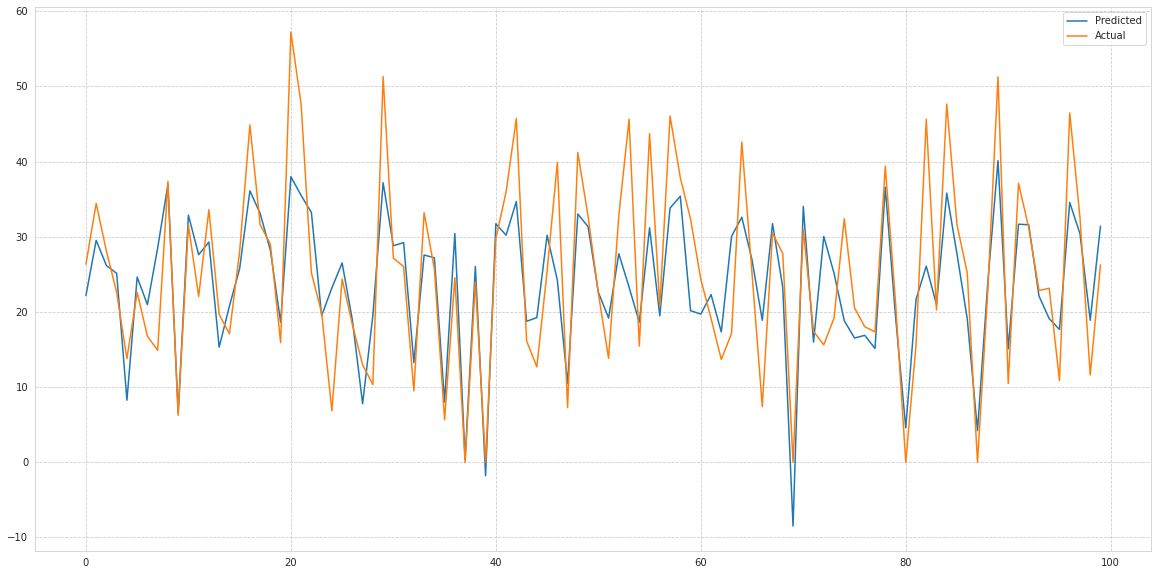

In [ ]:
get_linear_graph(linear_regression_model, X_train,y_train,X_test,y_test)

##**Hyperparametric Tuning**

##**Lasso Regression(L1)**

In [ ]:
lasso_model = Lasso()
#Finding pest parameter for alpha through gridsearchCV in Lasso
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid_search = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5) #Taking cross validation equals to 5



In [ ]:
#calling linearModel_train function to train,fit,evaluation and plotting graph for Lasso model
linearModel_train(lasso_grid_search, X_train,y_train,X_test,y_test)

MSE : 174447.83191781808
RMSE : 417.66952476547544
R2 : 0.5779051358879321
Adjusted R2 :  0.5740126184090889


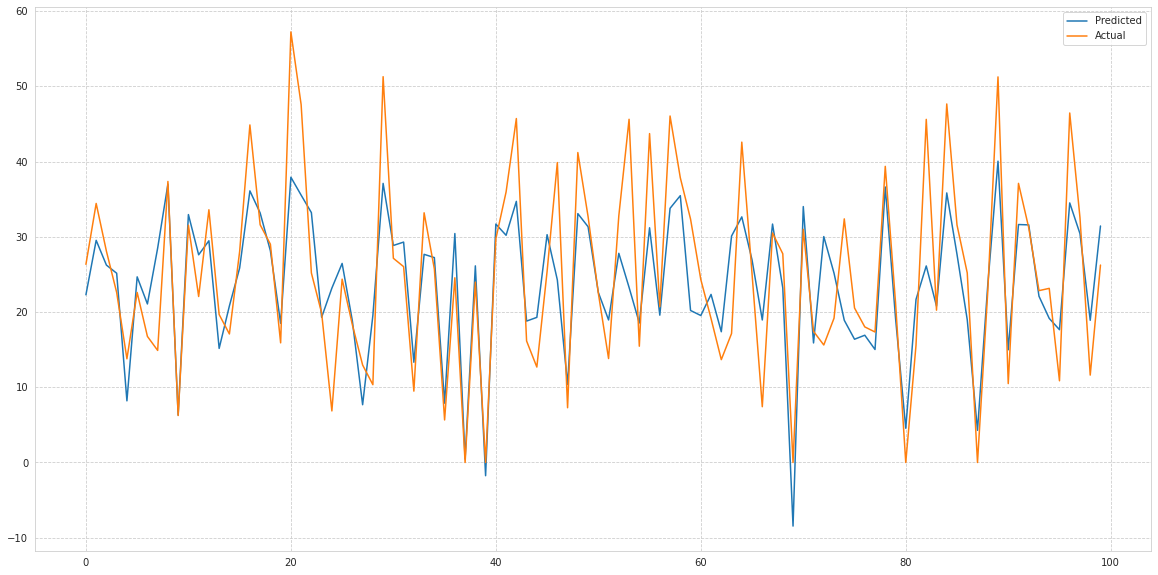

In [ ]:
get_linear_graph(lasso_grid_search, X_train,y_train,X_test,y_test)

##**Ridge Regression(L2)**

In [ ]:
ridge = Ridge()
#Finding the parameter for alpha in ridge regression
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid_search = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)

In [ ]:
#calling linearModel_train function to train,fit,evaluation and plotting graph of Ridge model
linearModel_train(ridge_grid_search, X_train,y_train,X_test,y_test)

MSE : 174369.82816322477
RMSE : 417.57613457096033
R2 : 0.5780938741705083
Adjusted R2 :  0.5742030972176139


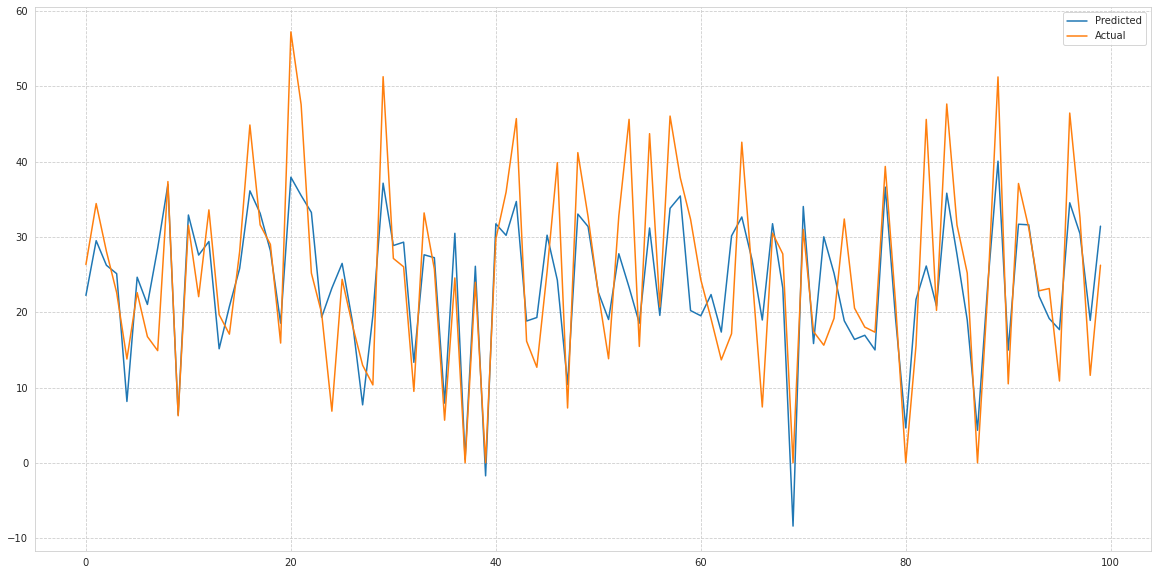

In [ ]:
get_linear_graph(ridge_grid_search, X_train,y_train,X_test,y_test)

##**ElasticNet Regression**

In [ ]:
elastic = ElasticNet()
#Finding best parameter of alpha for elasticnet
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_grid_search = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)

In [ ]:
#calling linearModel_train function to train,fit,evaluation and plotting graph of ElasticNet model
linearModel_train(elastic_grid_search, X_train,y_train,X_test,y_test)

MSE : 174678.12942988833
RMSE : 417.94512729530453
R2 : 0.5773479068527876
Adjusted R2 :  0.5734502506623811


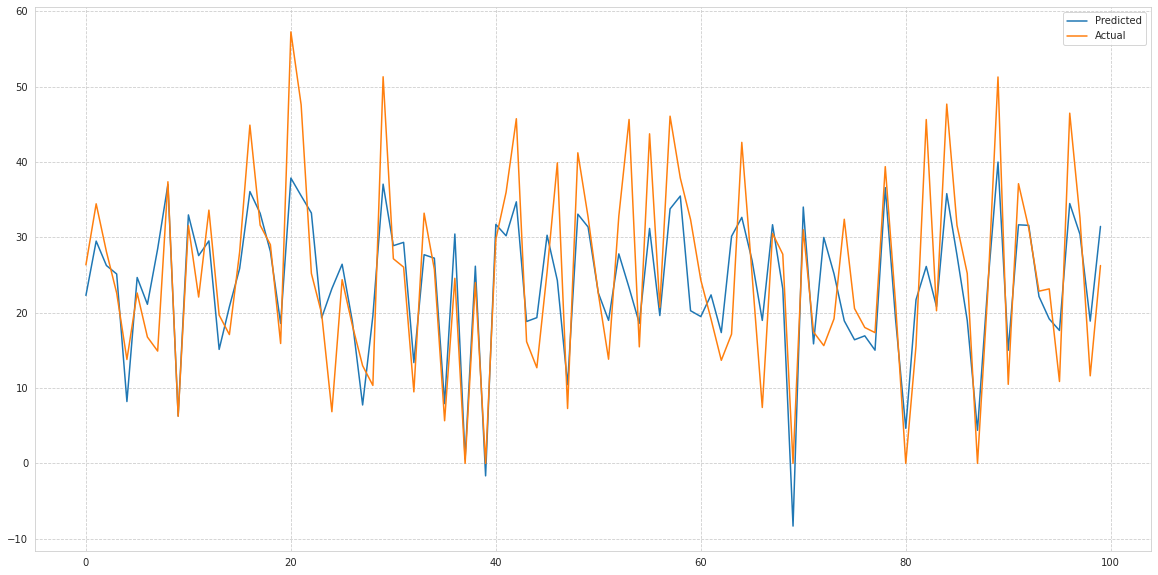

In [ ]:
get_linear_graph(elastic_grid_search, X_train,y_train,X_test,y_test)

##**Polynomial Regression**

In [ ]:
pipe= make_pipeline(PolynomialFeatures(degree=2),LinearRegression())
#calling linearModel_train function to train,fit,evaluation and plotting graph of ElasticNet model
linearModel_train(pipe, X_train,y_train,X_test,y_test)

MSE : 109836.70851305767
RMSE : 331.4162164304241
R2 : 0.7342385397132556
Adjusted R2 :  0.7317877135665191


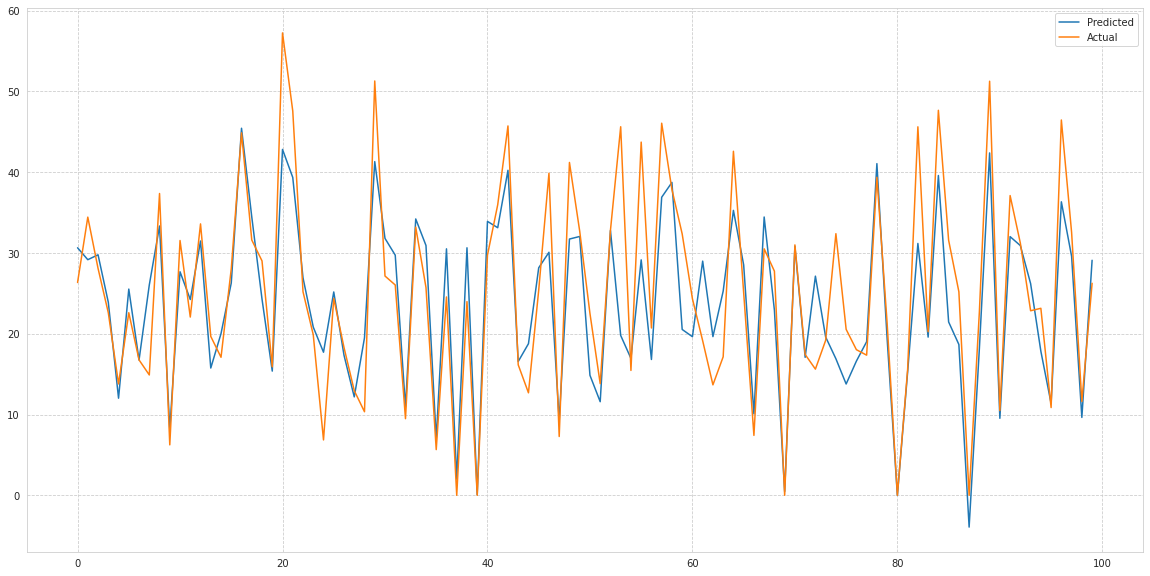

In [ ]:
get_linear_graph(pipe, X_train,y_train,X_test,y_test)

#**Train | test Split for Tree and Ensemble Based Models**

In [ ]:
#creating independent variable X
X= seoul_final_df.drop(['Rented Bike Count'],axis=1)

In [ ]:
#creating dependent variable y
y= seoul_final_df['Rented Bike Count']

In [ ]:
#splitting the variable X and y into train and test data in the ratio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

##**Decision Tree Regession**

In [ ]:
decision_tree=DecisionTreeRegressor()
#calling  tree_based_model function to train,fitnevaluate and graph plot for decision tree
tree_ensemble_model(decision_tree, X_train,y_train,X_test,y_test)

MSE : 58832.99714611872
RMSE : 242.55514248541243
R2 : 0.8576473799491215
Adjusted R2 :  0.8562517660270541


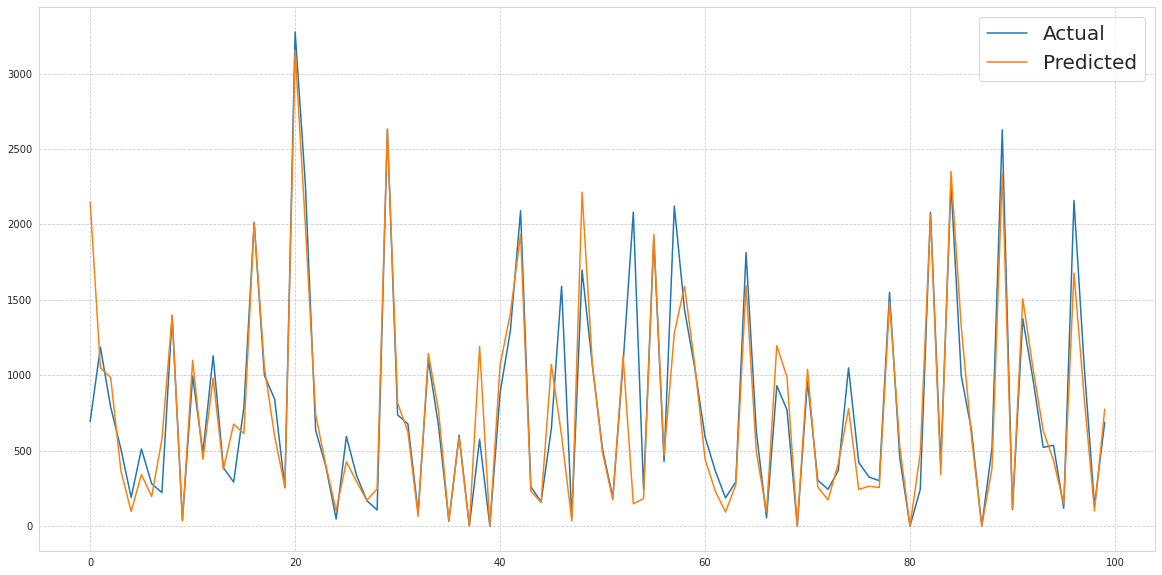

In [ ]:
get_graph(decision_tree, X_train,y_train,X_test,y_test)

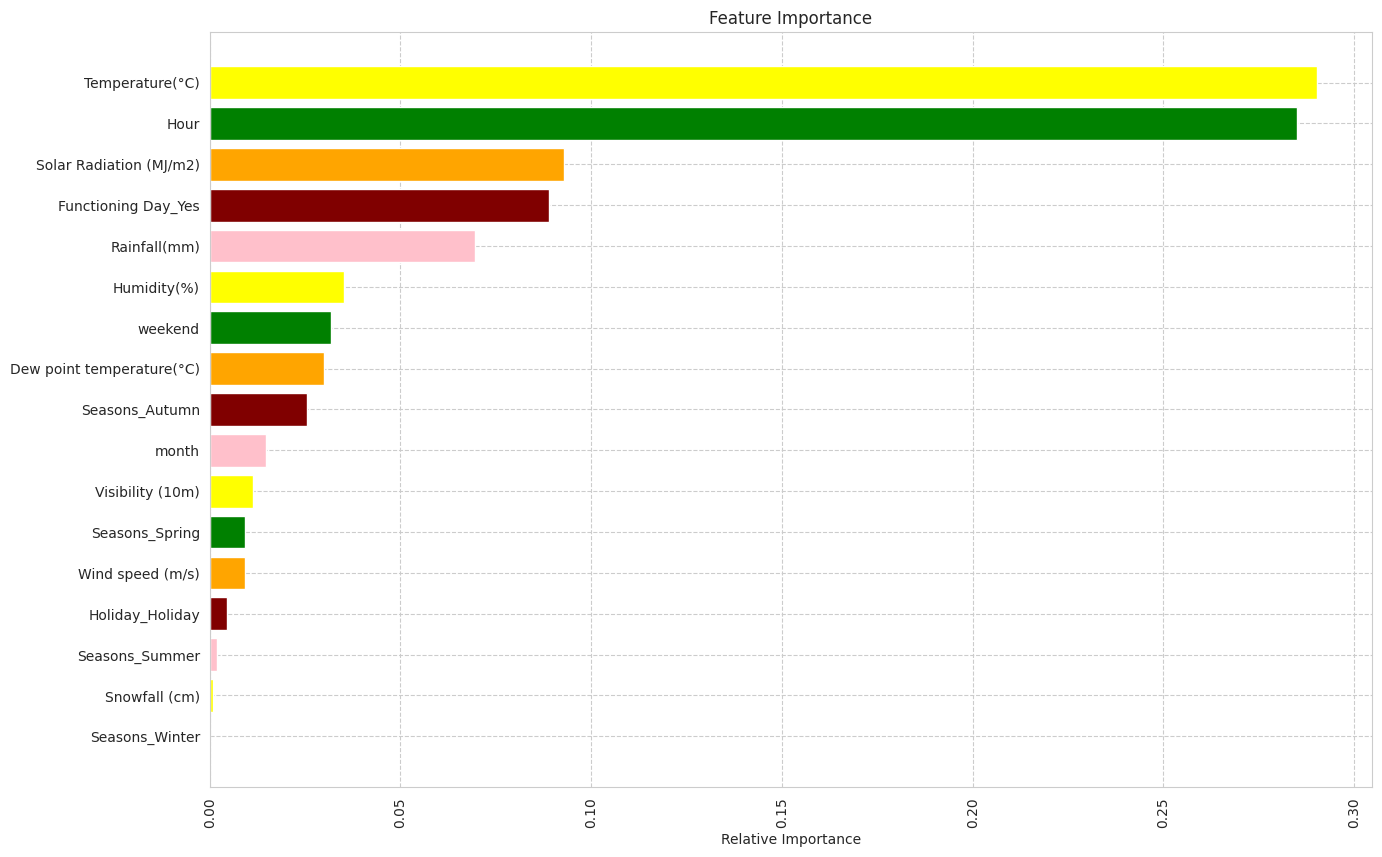

In [ ]:
get_feat_imp(decision_tree,X_train)

##**Random Forest**

In [ ]:
#random forest model
random_forest=RandomForestRegressor()

In [ ]:
#checking gridseach best parameter for random forest
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [ ]:
randomforest_grid= GridSearchCV(random_forest,param_grid=params,verbose=0)

In [ ]:
tree_ensemble_model(randomforest_grid, X_train,y_train,X_test,y_test)

MSE : 48247.29801118337
RMSE : 219.65267585709802
R2 : 0.8832605915824809
Adjusted R2 :  0.8821160875783877


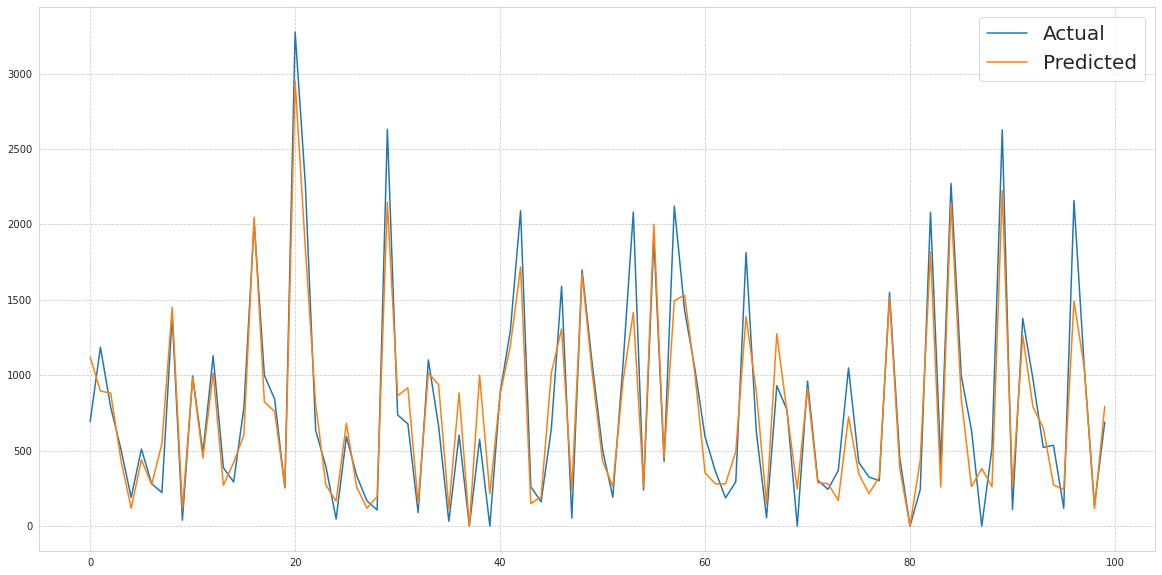

In [ ]:
get_graph(randomforest_grid, X_train,y_train,X_test,y_test)

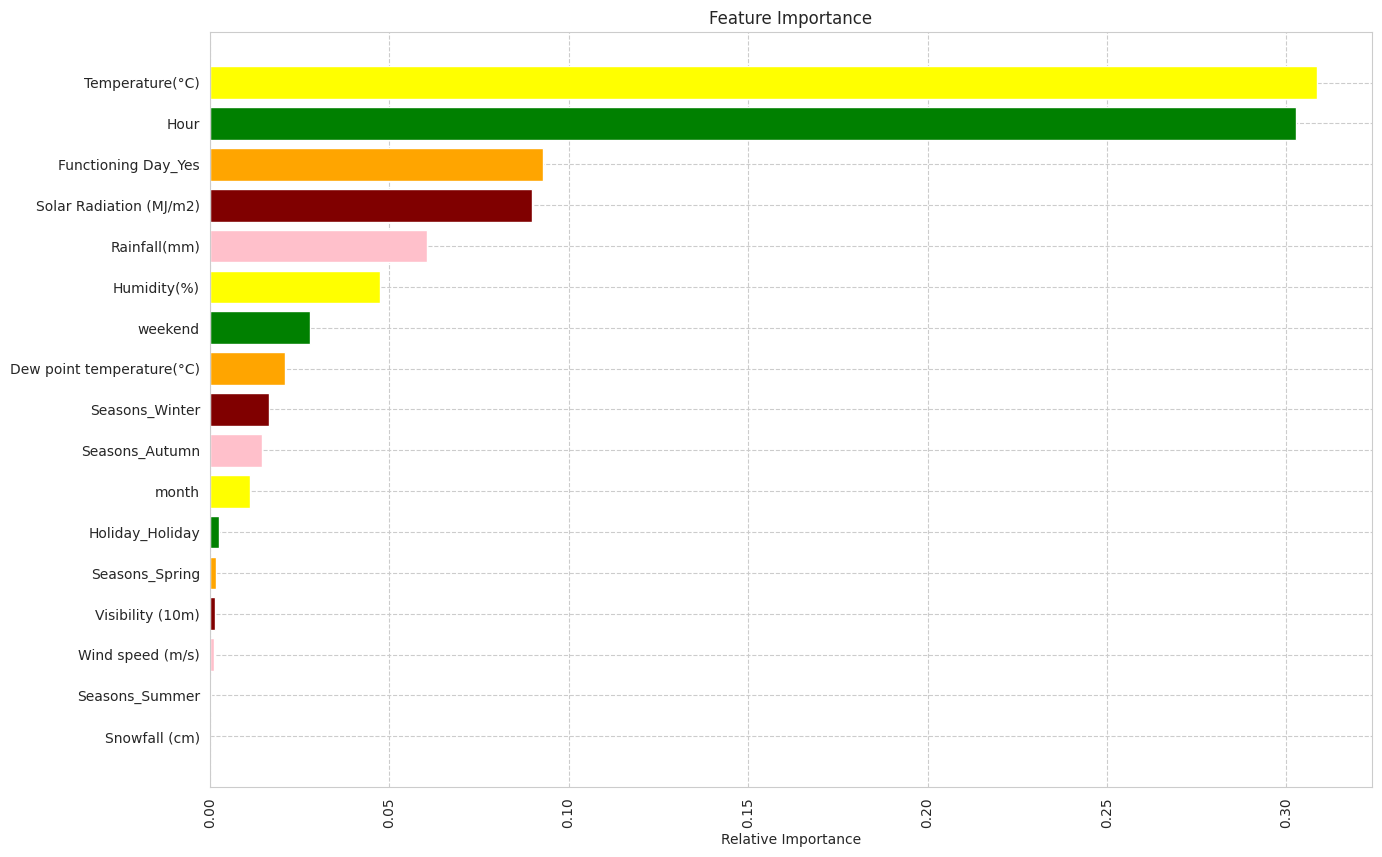

In [ ]:
optimal_randomforest_model=randomforest_grid.best_estimator_

get_feat_imp(optimal_randomforest_model,X_train)

##**KNN(K-Nearest-Neighbour)**

In [ ]:
#KNN regression model
knn=KNeighborsRegressor(n_jobs=-1)

scaler = MinMaxScaler()

X_train_scaler=scaler.fit_transform(X_train)
X_test_scaler=scaler.transform(X_test)

param_dict={'n_neighbors':[3,5,7,9,11,13,15,21,23,25]}
knn_grid= GridSearchCV(knn,param_grid=param_dict)

# training and evaluating the PolynomialFeatures
tree_ensemble_model(knn_grid,X_train_scaler,y_train,X_test_scaler,y_test)

MSE : 62180.18837899544
RMSE : 249.35955642203777
R2 : 0.8495484989652422
Adjusted R2 :  0.8480734842492151


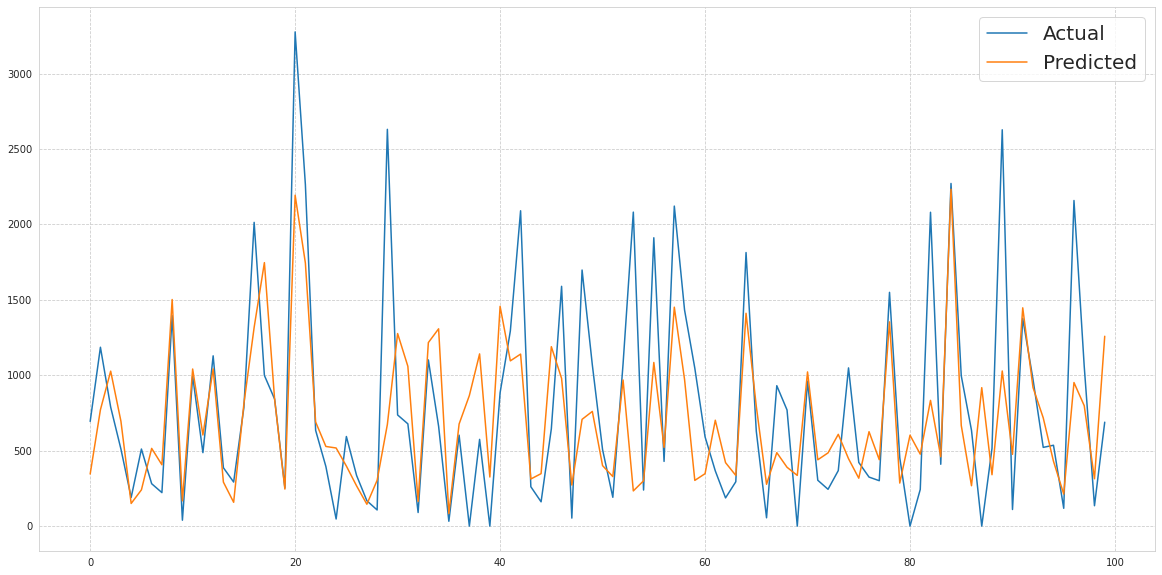

In [ ]:
get_graph(knn_grid, X_train,y_train,X_test,y_test)

##**Gradient Boosting**

In [ ]:
gradient_boosting=GradientBoostingRegressor()

In [ ]:
n_estimators=[80,100,150]
max_depth=[15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [ ]:
gradient_boosting_grid=GridSearchCV(gradient_boosting,param_grid=params,verbose=0)

In [ ]:
tree_ensemble_model(gradient_boosting_grid, X_train,y_train,X_test,y_test)

MSE : 38736.99136278833
RMSE : 196.8171521051667
R2 : 0.9062717780689344
Adjusted R2 :  0.9053528739323554


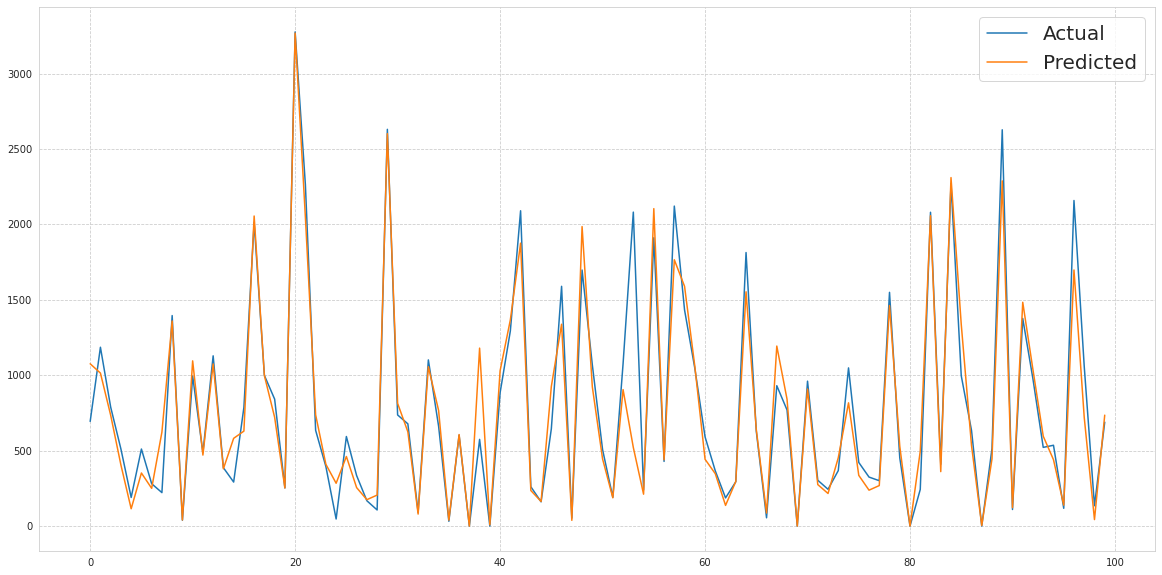

In [ ]:
get_graph(gradient_boosting_grid, X_train,y_train,X_test,y_test)

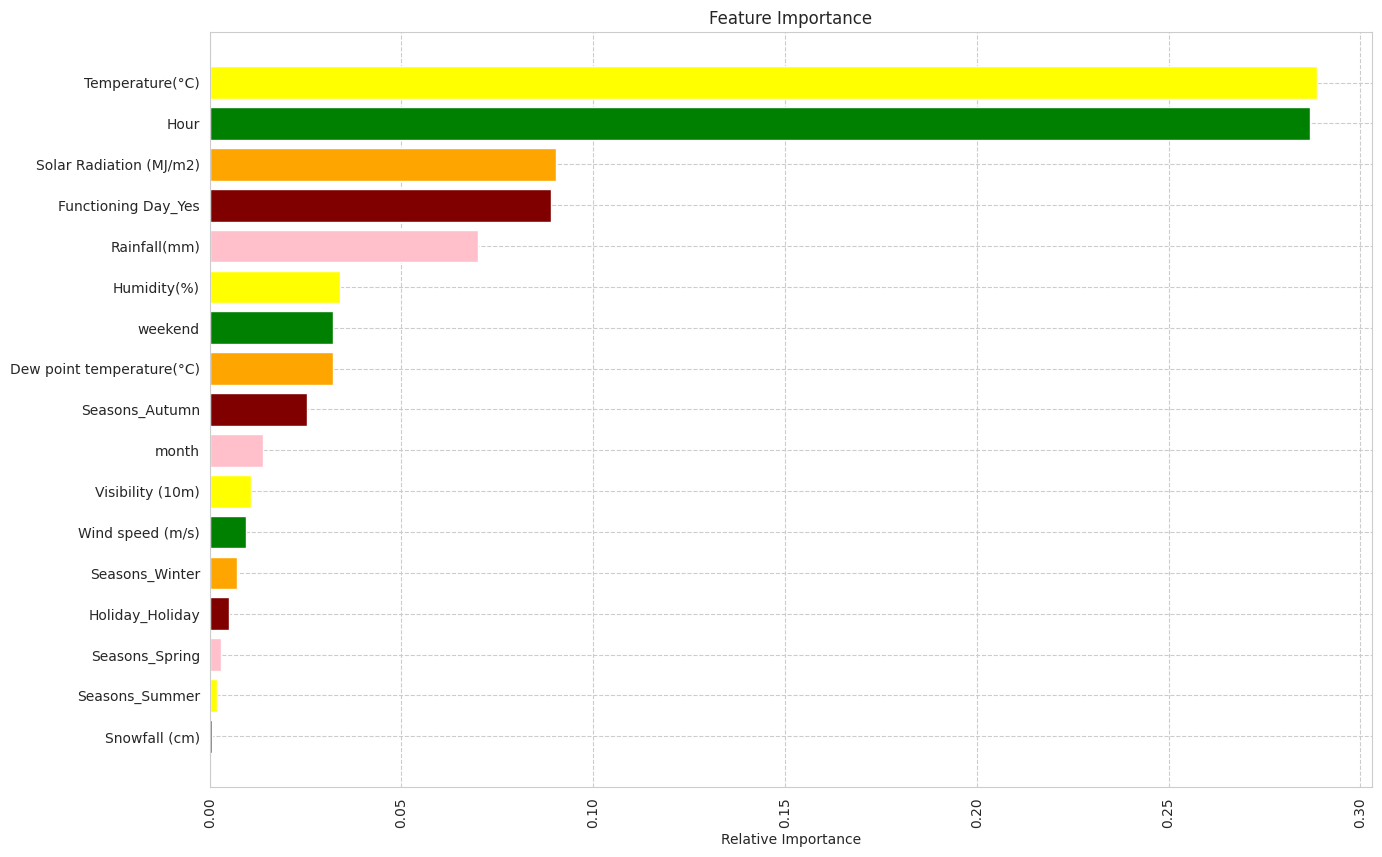

In [ ]:
optimal_GradientBoosting_model=gradient_boosting_grid.best_estimator_

get_feat_imp(optimal_GradientBoosting_model,X_train)

##**XGBoost**

In [ ]:
xgb_model=XGBRegressor()

In [ ]:
n_estimators=[80,100,150]
max_depth=[15,20,30]

parameter={'n_estimators':n_estimators,'max_depth':max_depth}

In [ ]:
xgb_grid=GridSearchCV(xgb_model,param_grid=params,verbose=0)

In [ ]:
tree_ensemble_model(xgb_grid, X_train,y_train,X_test,y_test)

[05:57:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:57:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:57:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:57:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:57:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:57:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:58:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:58:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[06:00:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:00:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:00:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:00:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:00:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:00:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:00:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:00:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

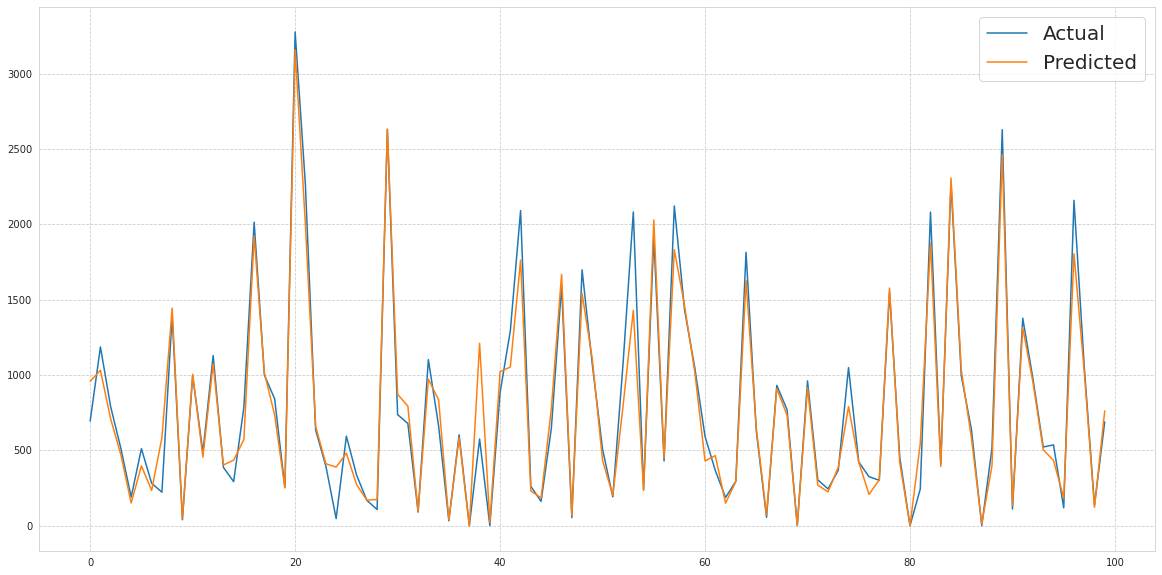

In [ ]:
get_graph(xgb_grid, X_train,y_train,X_test,y_test)

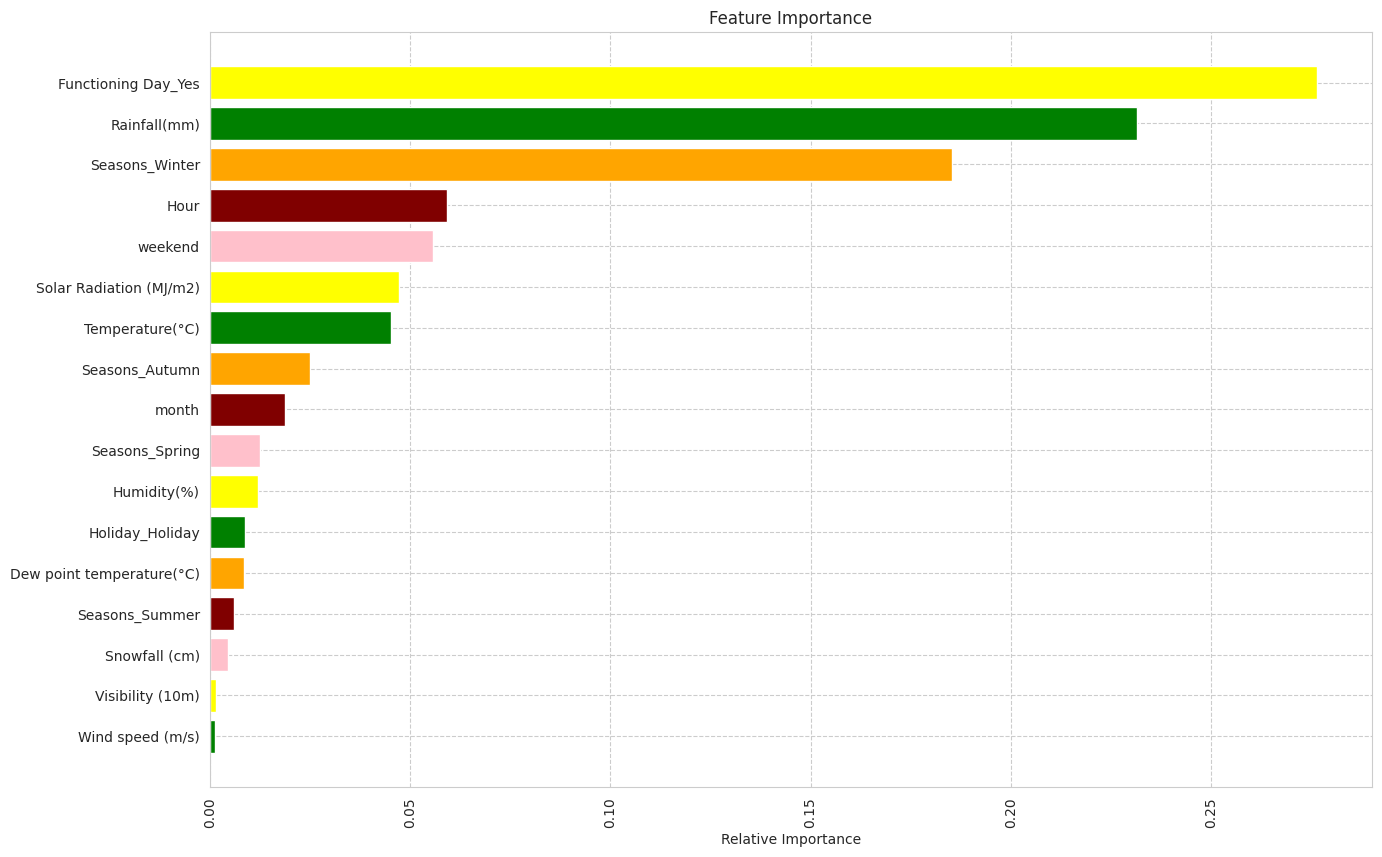

In [ ]:
op_xgb_model=xgb_grid.best_estimator_
get_feat_imp(op_xgb_model,X_train)

##**CatBoost**

In [ ]:
catboost=CatBoostRegressor(verbose=0)

In [ ]:
tree_ensemble_model(catboost, X_train,y_train,X_test,y_test)

MSE : 25934.328957476653
RMSE : 161.04138895785968
R2 : 0.9372491653418727
Adjusted R2 :  0.9366339610805186


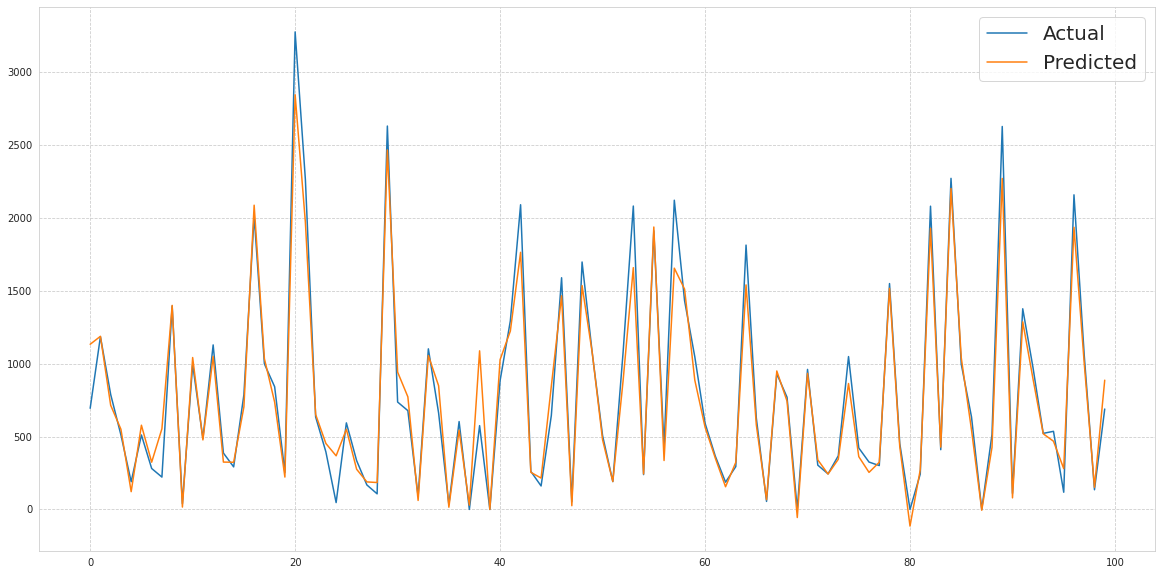

In [ ]:
get_graph(catboost, X_train,y_train,X_test,y_test)

In [ ]:
catboost.get_all_params()

{'auto_class_weights': 'None',
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': True,
 'boosting_type': 'Plain',
 'bootstrap_type': 'MVS',
 'border_count': 254,
 'classes_count': 0,
 'depth': 6,
 'eval_metric': 'RMSE',
 'feature_border_type': 'GreedyLogSum',
 'force_unit_auto_pair_weights': False,
 'grow_policy': 'SymmetricTree',
 'iterations': 1000,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 1,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.05569100007414818,
 'loss_function': 'RMSE',
 'max_leaves': 64,
 'min_data_in_leaf': 1,
 'model_shrink_mode': 'Constant',
 'model_shrink_rate': 0,
 'model_size_reg': 0.5,
 'nan_mode': 'Min',
 'penalties_coefficient': 1,
 'pool_metainfo_options': {'tags': {}},
 'posterior_sampling': False,
 'random_seed': 0,
 'random_strength': 1,
 'rsm': 1,
 'sampling_frequency': 'PerTree',
 'score_function': 'Cosine',
 'sparse_features_conflict_fracti

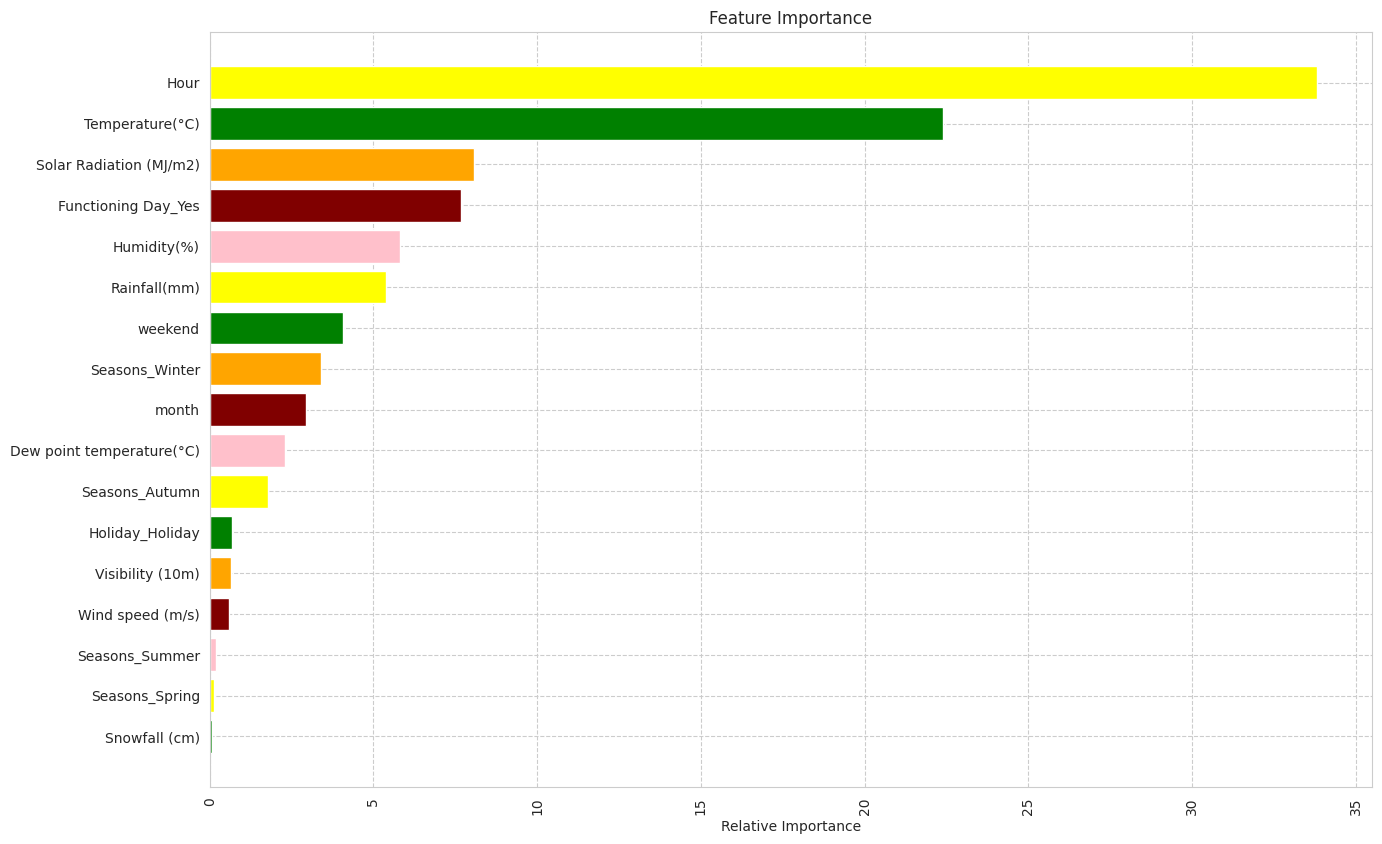

In [ ]:
get_feat_imp(catboost,X_train)

##**LightGBM**

In [ ]:
lgb_r=lgb.LGBMRegressor()

In [ ]:
n_estimators=[150,200,250]
max_depth=[7,10,13]

lgb_r_params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [ ]:
lgb_r_grid=GridSearchCV(estimator=lgb_r,param_grid=lgb_r_params,cv=5,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1)

In [ ]:
tree_ensemble_model(lgb_r_grid, X_train,y_train,X_test,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
MSE : 26576.833346265892
RMSE : 163.02402689869334
R2 : 0.9356945584448082
Adjusted R2 :  0.9350641129393651


Fitting 5 folds for each of 9 candidates, totalling 45 fits


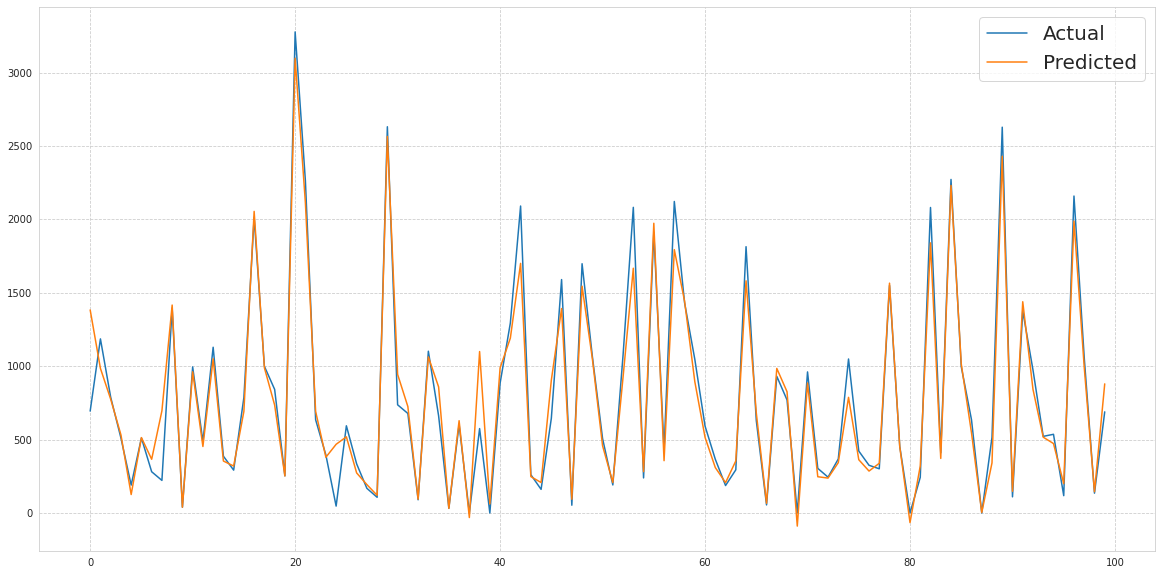

In [ ]:
get_graph(lgb_r_grid, X_train,y_train,X_test,y_test)

In [ ]:
op_lgb_r=lgb_r_grid.best_estimator_

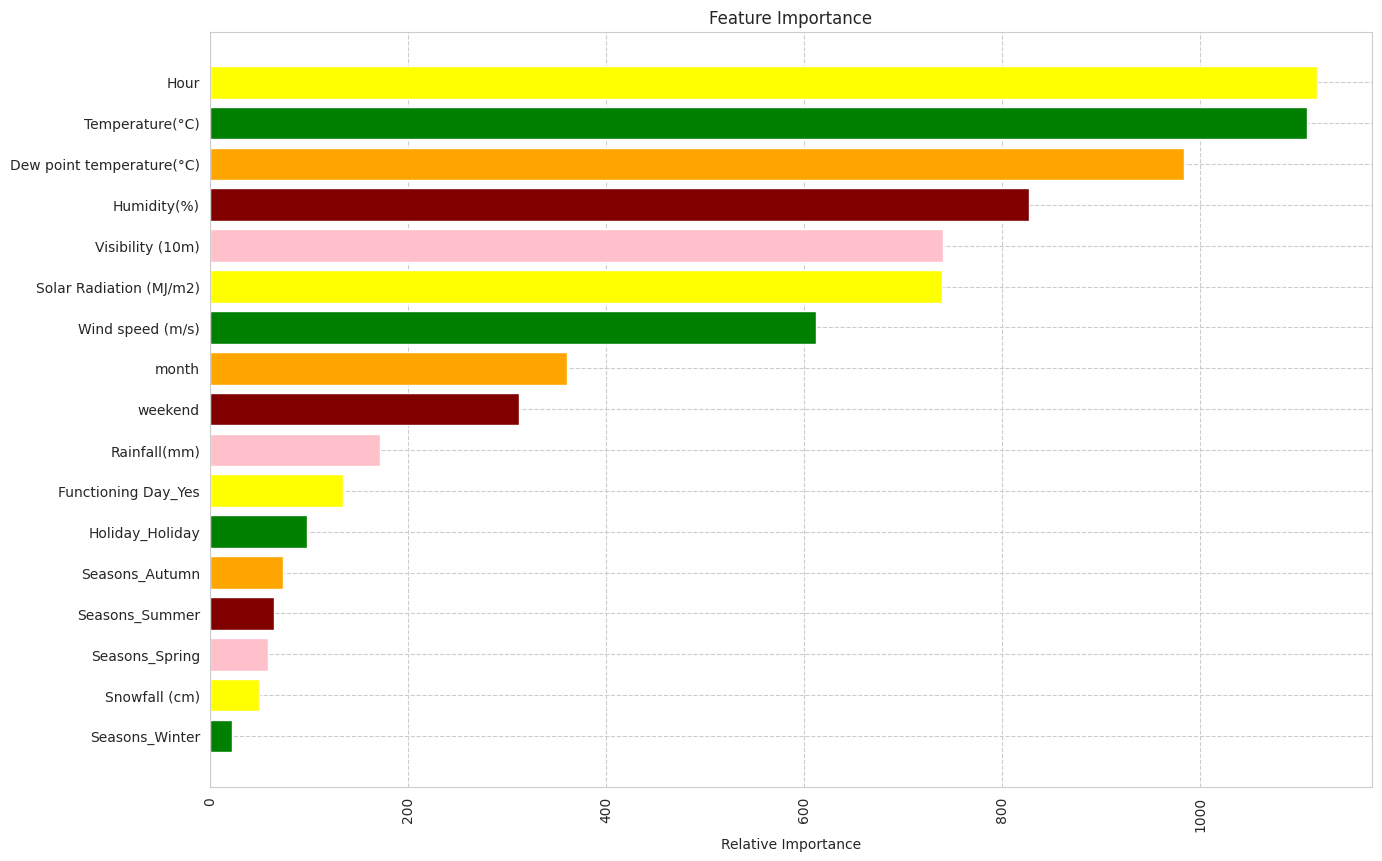

In [ ]:
get_feat_imp(op_lgb_r,X_train)

#**Lets see all the models with their evaluation matrices combined**

In [ ]:
evaluation_matrices={'MSE':mse_list,'RMSE':rmse_list,'r2 score':r2_list,'Adjusted r2 score':adjusted_r2_list}

list_of_models=['Linear','Lasso','Ridge','ElasticNet','Polynomial','Decision Tree','Random Forest','KNN','GB','XGB','CatBoost','LBGM']

model_df=pd.DataFrame.from_dict(evaluation_matrices,orient='index',columns=list_of_models)

model_df

Linear          Lasso          Ridge     ElasticNet  \
MSE                174545.731421  174447.831918  174369.828163  174678.129430   
RMSE                  417.786706     417.669525     417.576135     417.945127   
r2 score                0.577668       0.577905       0.578094       0.577348   
Adjusted r2 score       0.573774       0.574013       0.574203       0.573450   

                      Polynomial  Decision Tree  Random Forest           KNN  \
MSE                109836.708513   58832.997146   48247.298011  62180.188379   
RMSE                  331.416216     242.555142     219.652676    249.359556   
r2 score                0.734239       0.857647       0.883261      0.849548   
Adjusted r2 score       0.731788       0.856252       0.882116      0.848073   

                             GB           XGB      CatBoost          LBGM  
MSE                38736.991363  27257.043605  25934.328957  26576.833346  
RMSE                 196.817152    165.097073    161.041389    163.024027  
r2 score               0.906272      0.934049      0.937249      0.935695  
Adjusted r2 score      0.905353      0.933402      0.936634      0.935064

In [ ]:
model_df2=model_df.transpose().reset_index().rename(columns={'index':'Model'})
model_df2

Model            MSE        RMSE  r2 score  Adjusted r2 score
0          Linear  174545.731421  417.786706  0.577668           0.573774
1           Lasso  174447.831918  417.669525  0.577905           0.574013
2           Ridge  174369.828163  417.576135  0.578094           0.574203
3      ElasticNet  174678.129430  417.945127  0.577348           0.573450
4      Polynomial  109836.708513  331.416216  0.734239           0.731788
5   Decision Tree   58832.997146  242.555142  0.857647           0.856252
6   Random Forest   48247.298011  219.652676  0.883261           0.882116
7             KNN   62180.188379  249.359556  0.849548           0.848073
8              GB   38736.991363  196.817152  0.906272           0.905353
9             XGB   27257.043605  165.097073  0.934049           0.933402
10       CatBoost   25934.328957  161.041389  0.937249           0.936634
11           LBGM   26576.833346  163.024027  0.935695           0.935064

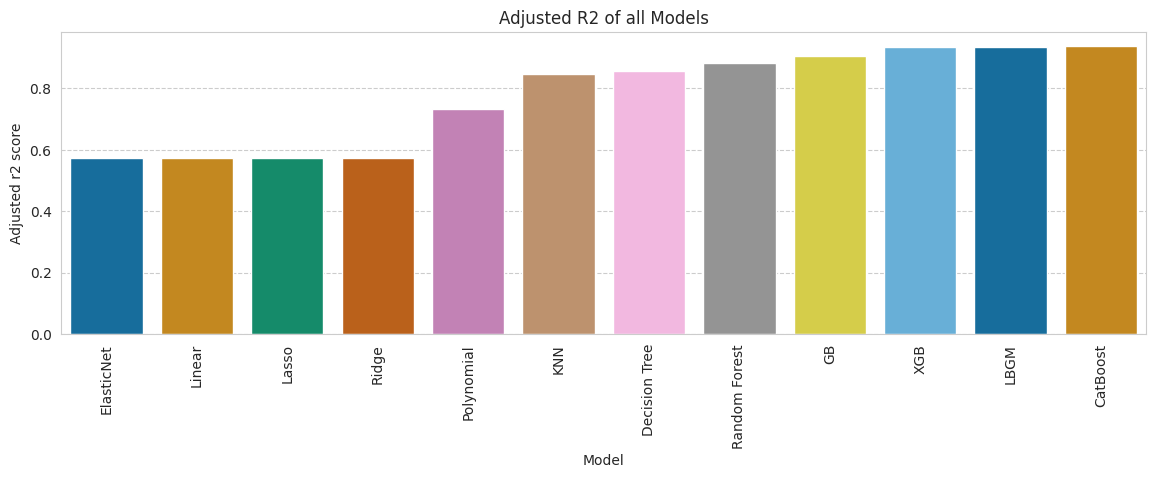

In [ ]:
plt.figure(figsize=(14,4),dpi=100)
sns.barplot(x='Model',y='Adjusted r2 score',data=model_df2.sort_values('Adjusted r2 score'),palette="colorblind").set(title='Adjusted R2 of all Models')
plt.xticks(rotation=90);

#**Model explainability**
##**SHAP**

##**Creating function for getting shape of JS visualization using shap in notebook environment**

In [ ]:
from sklearn.tree import export_graphviz
import shap 

In [ ]:
#creating function for getting shape of JS visualization using shap in notebook environment
def get_shap(model):
  sns.set_style('darkgrid')
  for_instance=2
  shap.initjs()
  explainer = shap.TreeExplainer(model)
  shap_values = explainer(X_test,check_additivity=False)
  return shap.plots.force(shap_values[for_instance])

##**Creating Function to get Shap summary**

In [ ]:
def get_shap_summary(model):
  model.fit(X_train,y_train)
  explainer = shap.TreeExplainer(model)
  shap_values=explainer.shap_values(X_train,check_additivity=False)
  return shap.summary_plot(shap_values, X_train)
  return shap.summary_plot(shap_values, X_train, plot_type="bar")

##**Shap for XGBoost**

In [ ]:
get_shap(decision_tree)

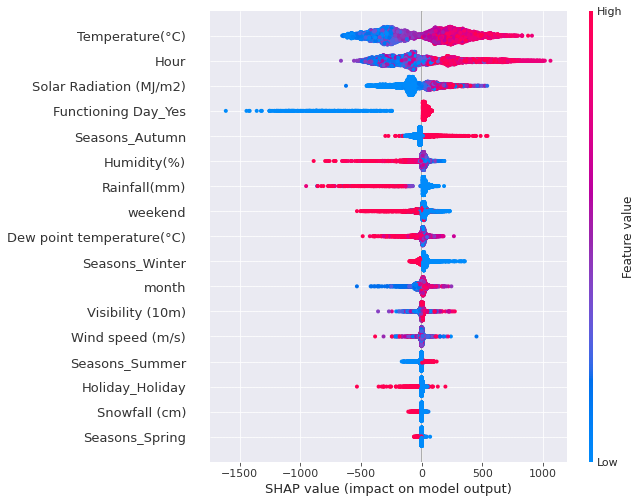

In [ ]:
get_shap_summary(decision_tree)

In [ ]:
get_shap(optimal_randomforest_model)

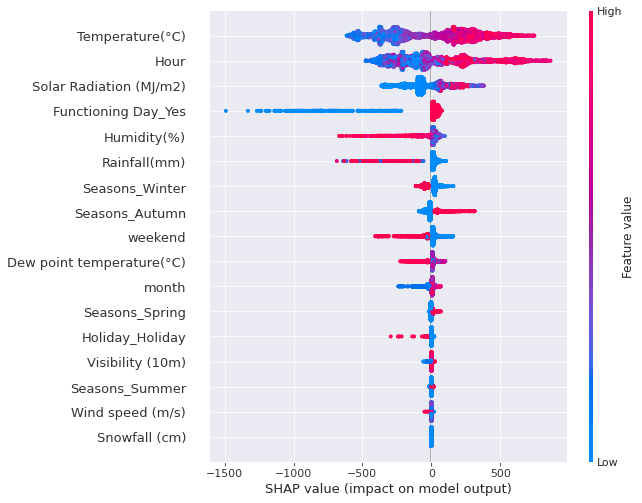

In [ ]:
get_shap_summary(optimal_randomforest_model)

In [ ]:
#getting shap model for XGBoost
get_shap(op_xgb_model)

[06:52:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


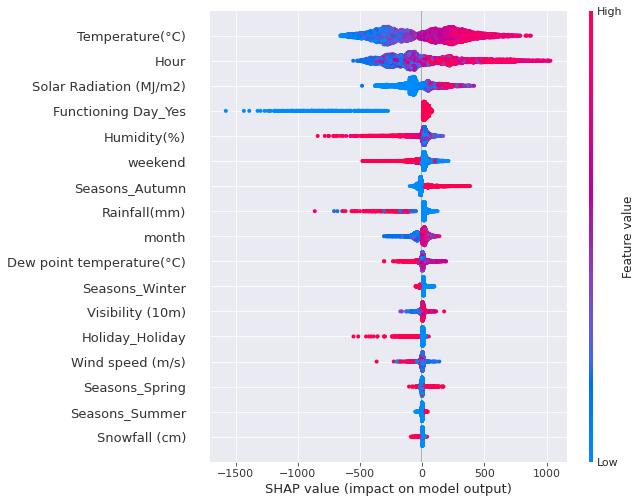

In [ ]:
get_shap_summary(op_xgb_model)

##**Shap for CatBoost Model**

In [ ]:
#getting shap model for CatBoost
get_shap(catboost)

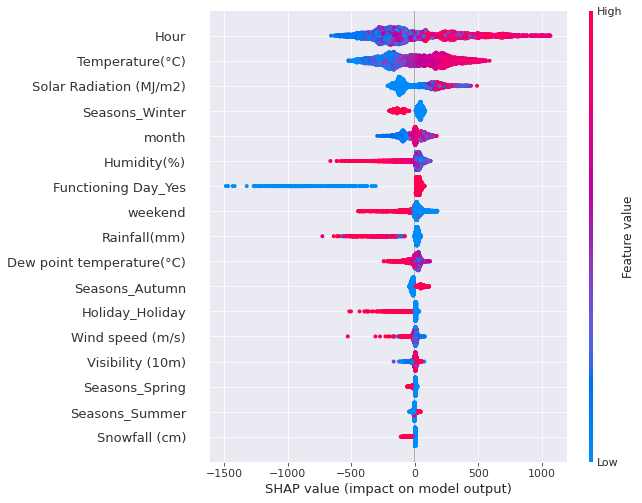

In [ ]:
get_shap_summary(catboost)

##**Shap for LightGBM Model**

In [ ]:
#getting shap model for LightGBM model
get_shap(op_lgb_r)

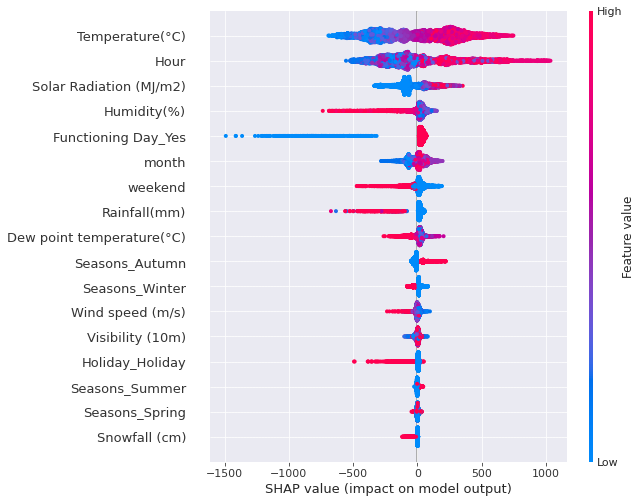

In [ ]:
get_shap_summary(op_lgb_r)

#**ELI5**

##**Creating function to get ELI5**

In [ ]:
def get_eli5(model):
  feature_names=list(X_test.columns)
  for_instance=2
  return eli.show_prediction(model, X_test.reset_index(drop=True).loc[[for_instance]],feature_names=feature_names,show_feature_values=True)

In [ ]:
get_eli5(decision_tree)

In [ ]:
get_eli5(optimal_randomforest_model)

###ELI5 for XGBoost Model

In [ ]:
get_eli5(op_xgb_model)

###ELI5 for lightBGM Model

In [ ]:
get_eli5(op_lgb_r)